In [1]:
# Your case study is to build a classifier using logistic regression to predict hospital readmittance. There is missing data that must be imputed. Once again, discuss variable importances as part of your submission.


import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import GridSearchCV
# from tabulate import tabulate
import pandas as pd
import numpy as np
# !pip install sweetviz
import sweetviz as sv



## Load Data 

In [2]:

# The data was downloaded from the SMU ___ website and then the file paths for both files are a assigned a variable (filepath and filepath2).

filepath = "/Users/tmc/Desktop/MS_SMU_Admin/05_2024Summer/QTW/Data_Science/Case_Study2/dataset_diabetes/diabetic_data.csv" # one dot current directory, two dots means the parent directory one level up from the current directory 
# filepath2 = "/Users/tmc/Desktop/MS_SMU_Admin/05_2024Summer/QUANTIFIYING_TW/00_Case_Studies/Case_study2/dataset_diabetes/IDs_mapping.csv"


In [3]:
df = pd.DataFrame(pd.read_csv(filepath))
df.head()

encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No   
1                 3  ...          No      Up                   No   
2                 2  ...          No      No                   No   
3                 2  ...          No      Up                   No   
4                 1  ...          No  Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone  change diabetesMed readmitted  
0                      No      No          No         NO  
1                      No      Ch         Yes        >30  
2                      No      No         Yes         NO  
3                      No      Ch         Yes         NO  
4                      No      Ch         Yes         NO  

[5 rows x 50 columns]

### Trying out a new package for data visualization called sweetviz. I had previously used pandas-profiling package at work but could nto get it to work so trying something new to see how it works. 

In [7]:

# Generate the report using SweetViz package, it takes a few minutes to run but provides a comprehensive report on the data
report = sv.analyze(df)


                                             |                                                                …

In [14]:
import sweetviz as sv
from IPython.display import IFrame


# Save the report as an HTML file
report_html_path = "sweetviz_report.html"
report.show_html(report_html_path)

# Display the report in the notebook using an IFrame
IFrame(report_html_path, width=1000, height=600)


Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



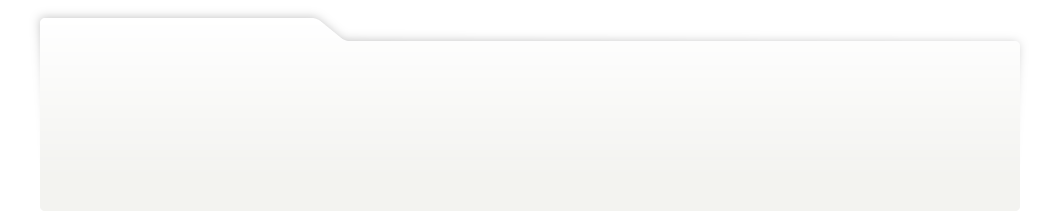
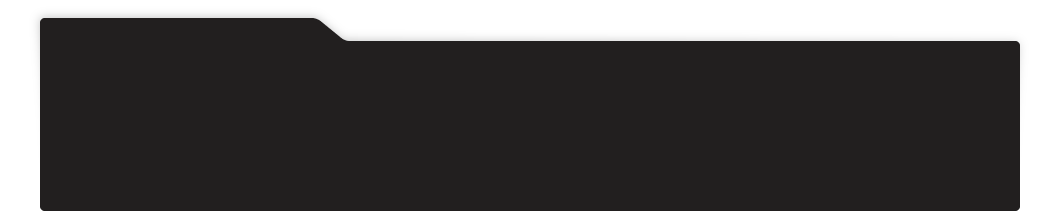
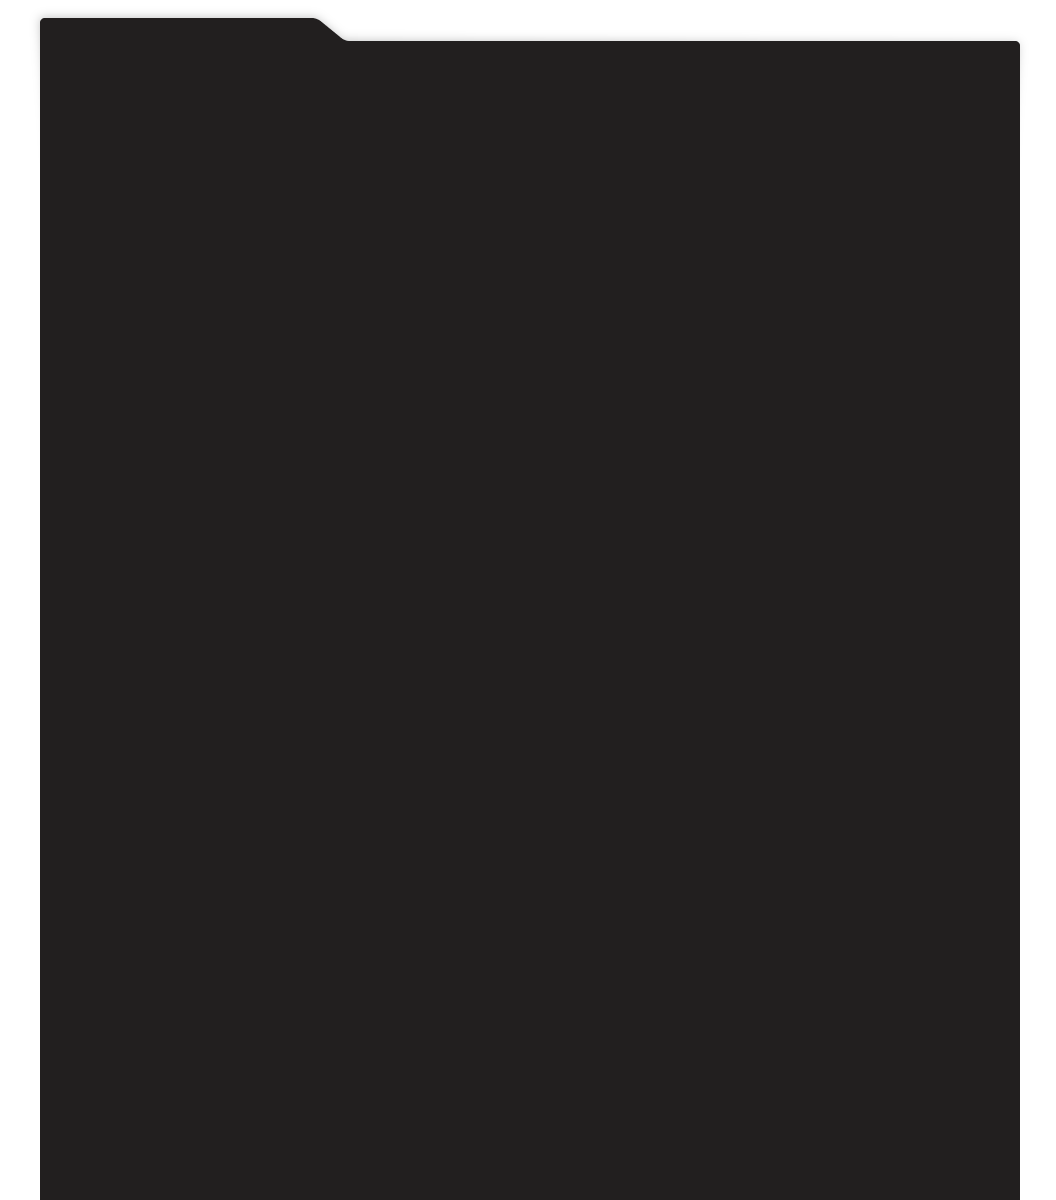
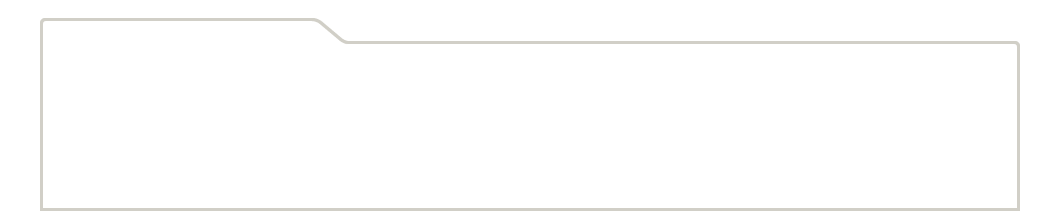
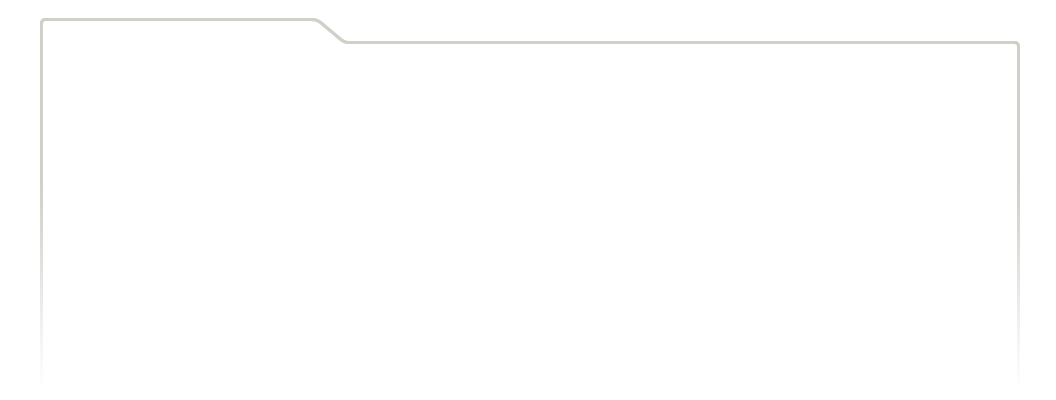
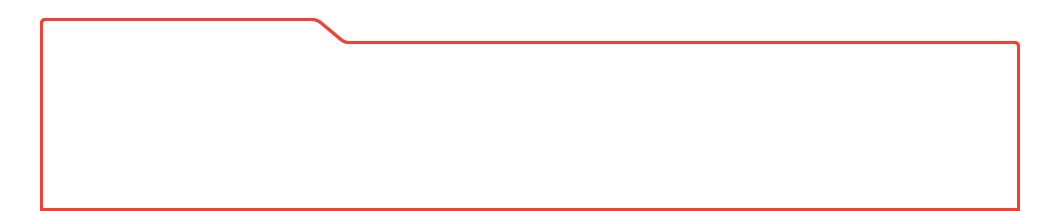
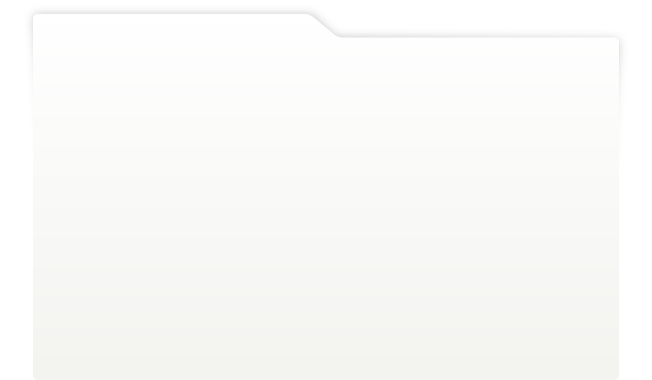
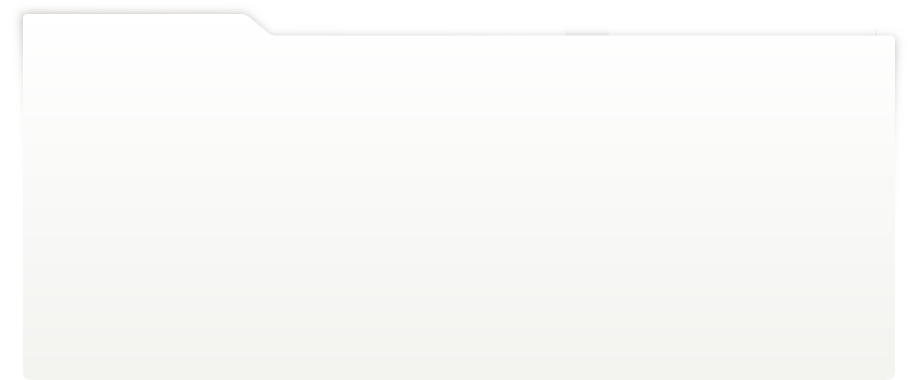
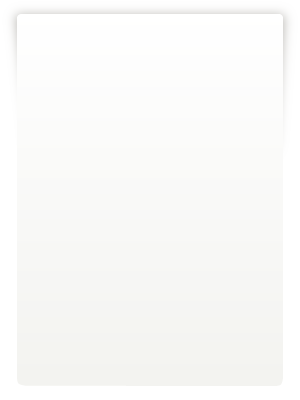
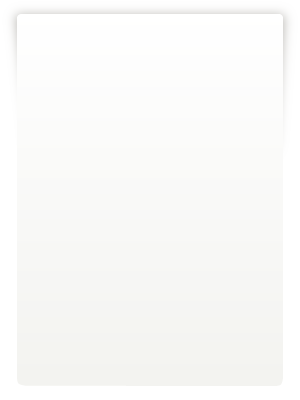
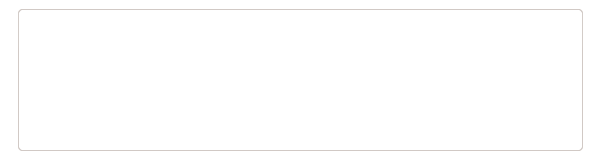
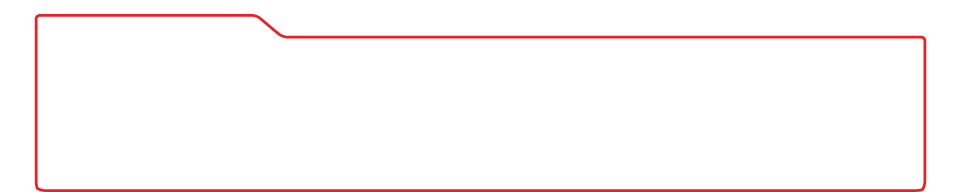
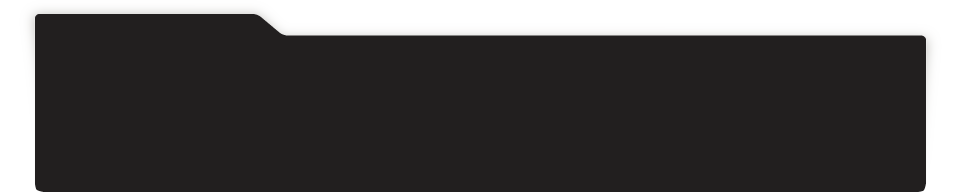
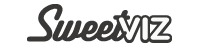
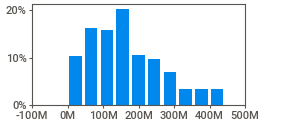
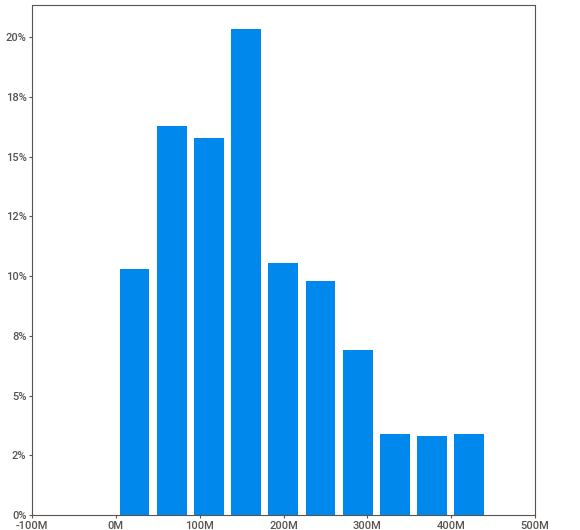
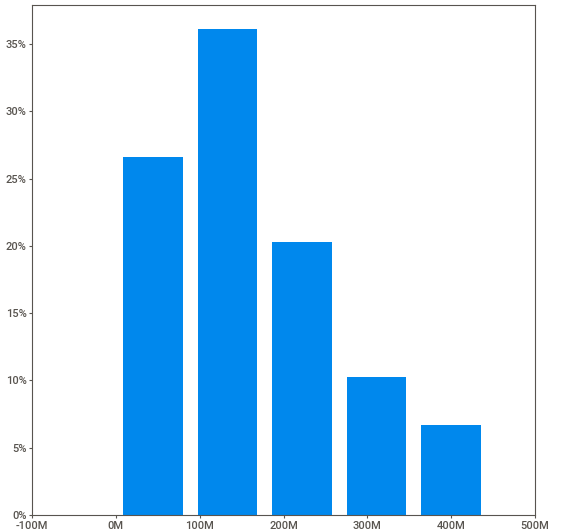
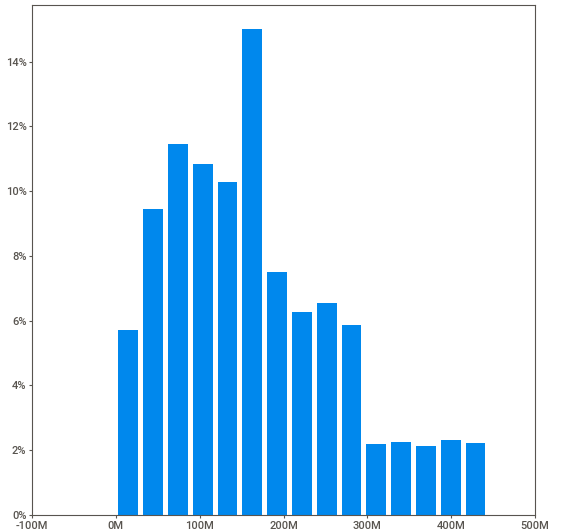
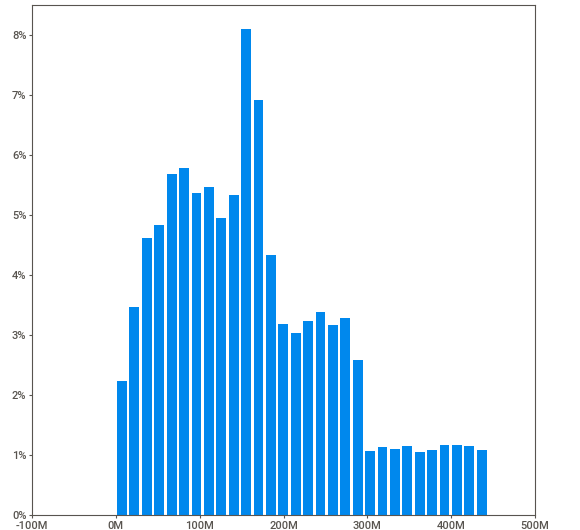
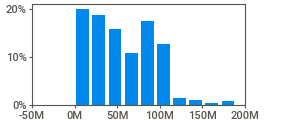
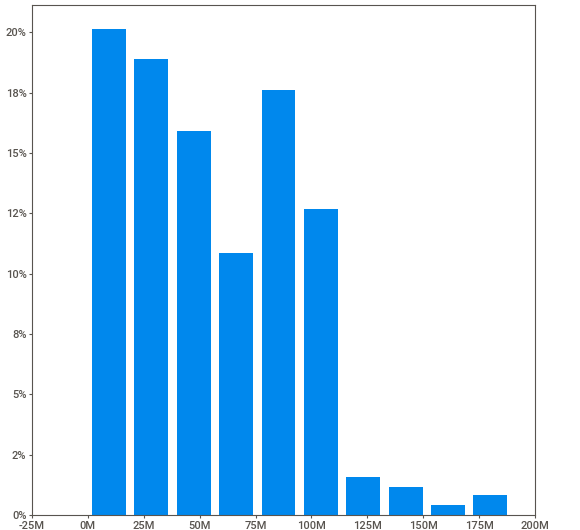
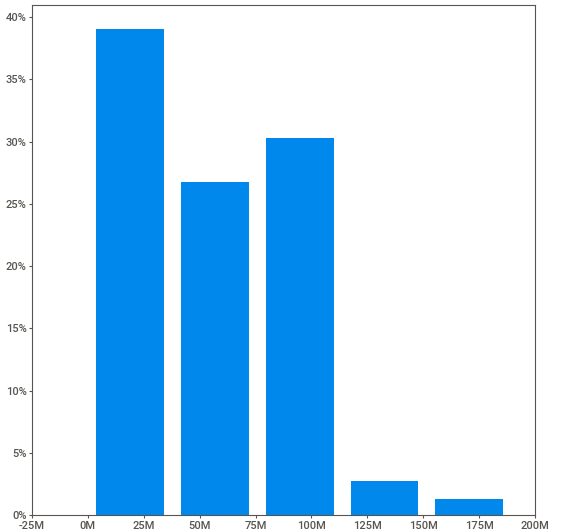
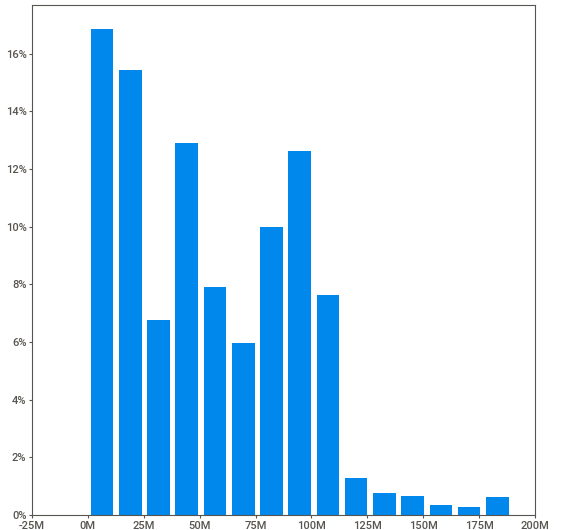
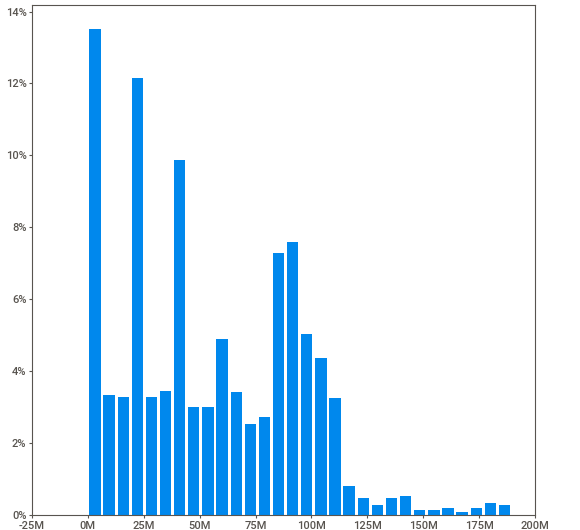
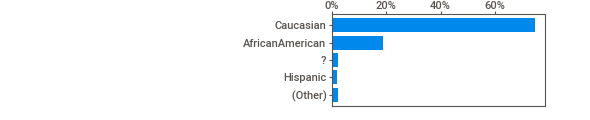
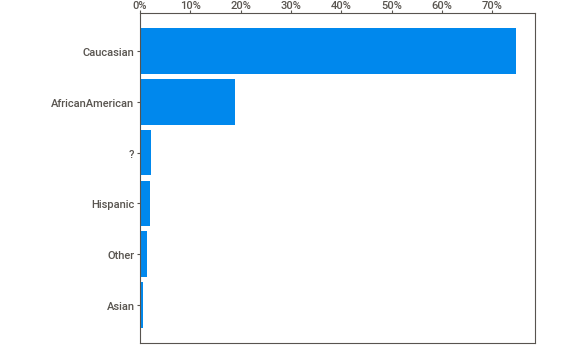
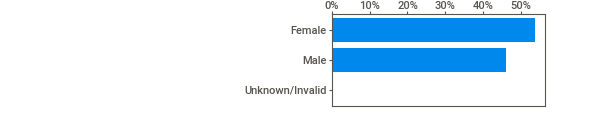
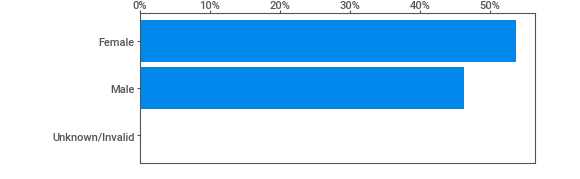
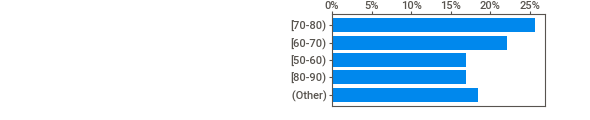
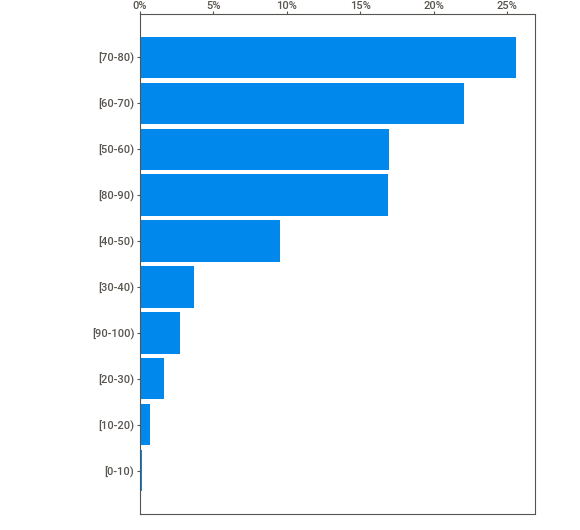
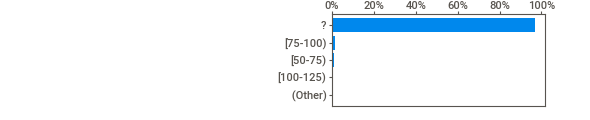
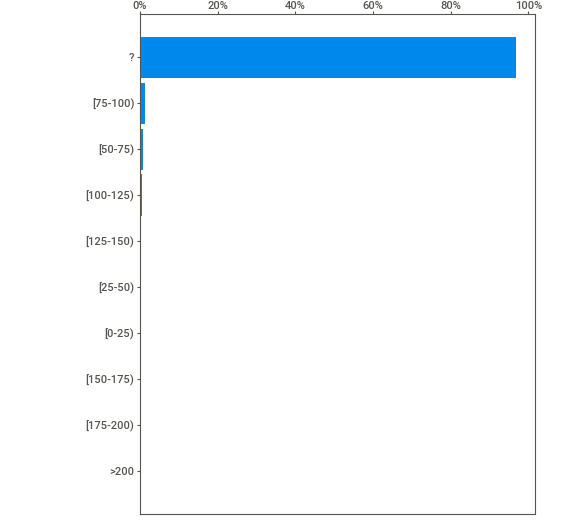
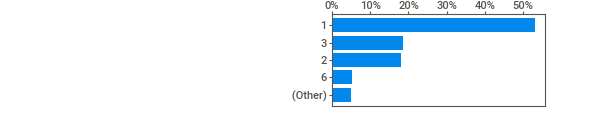
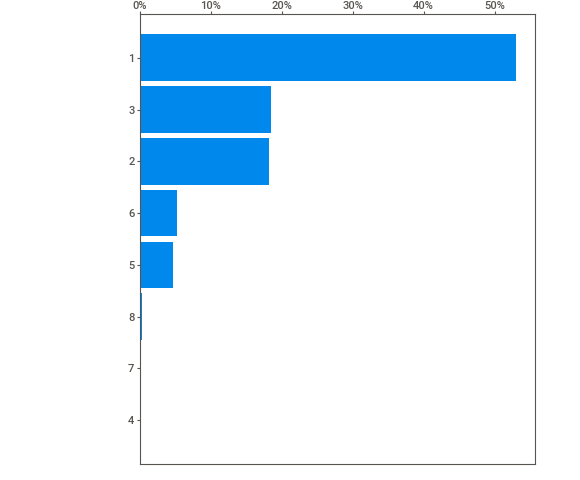
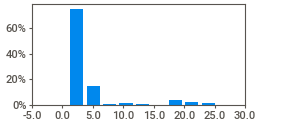
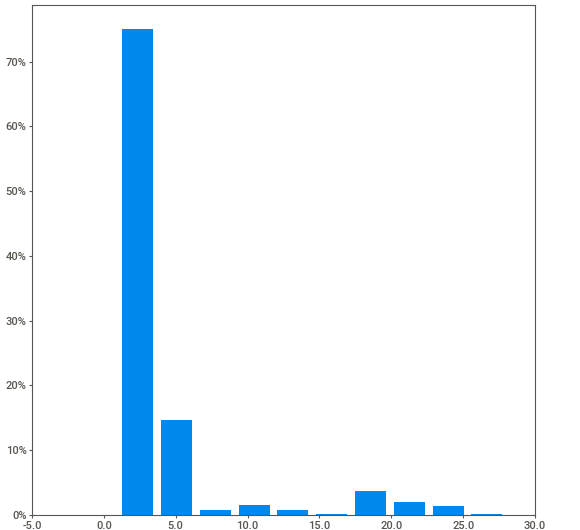
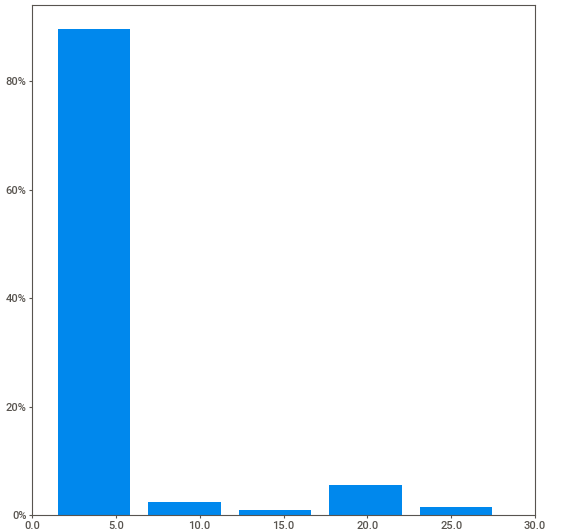
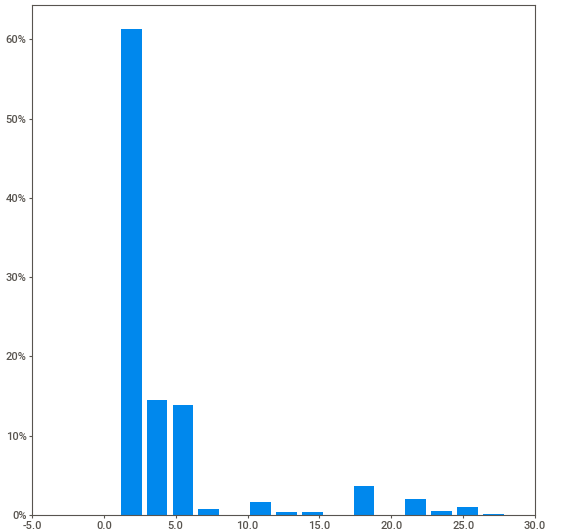
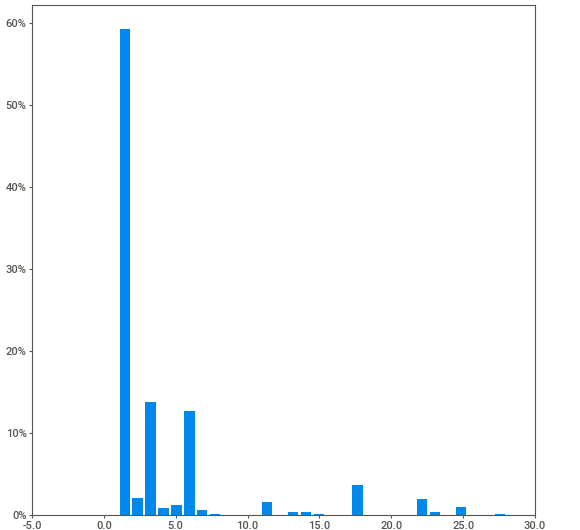
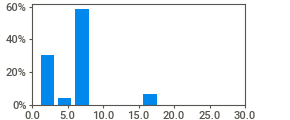
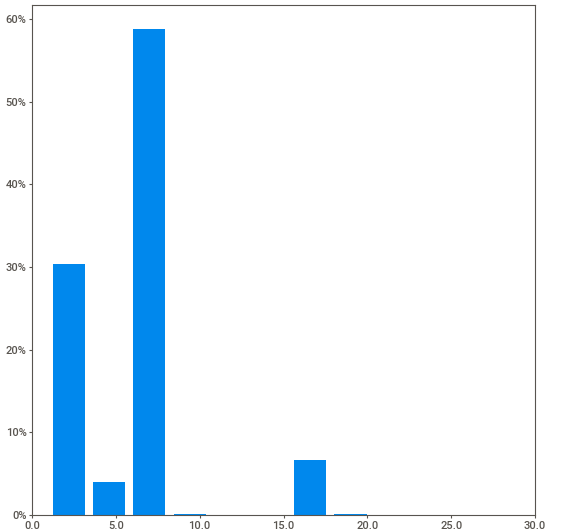
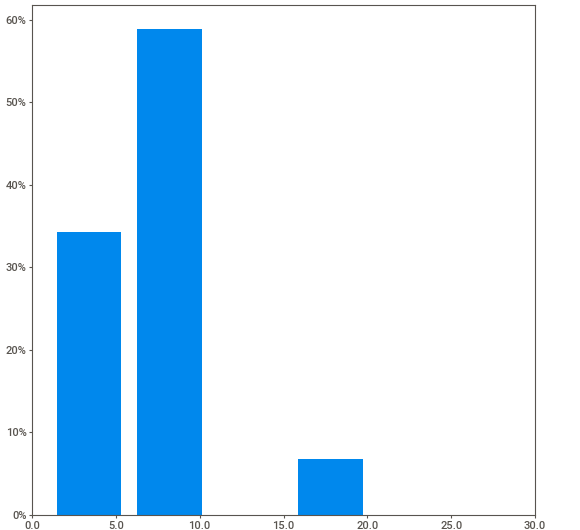
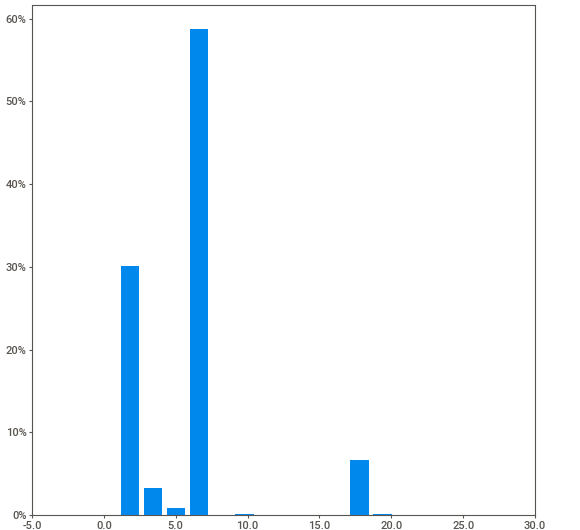
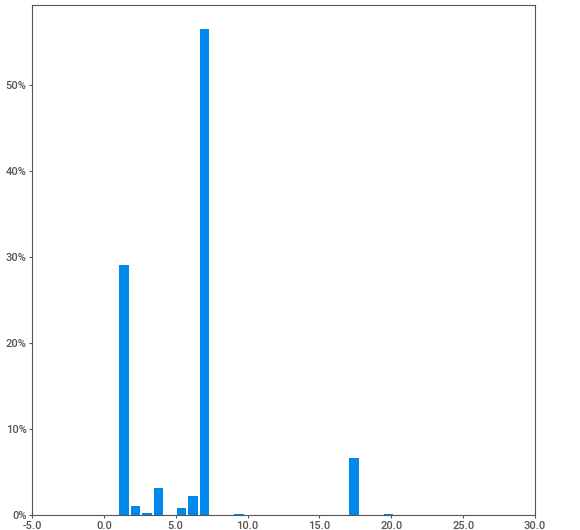
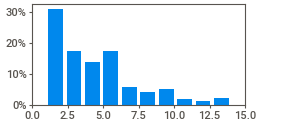
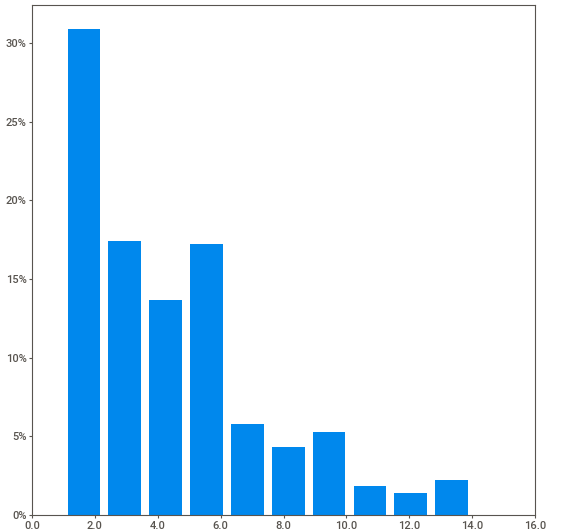
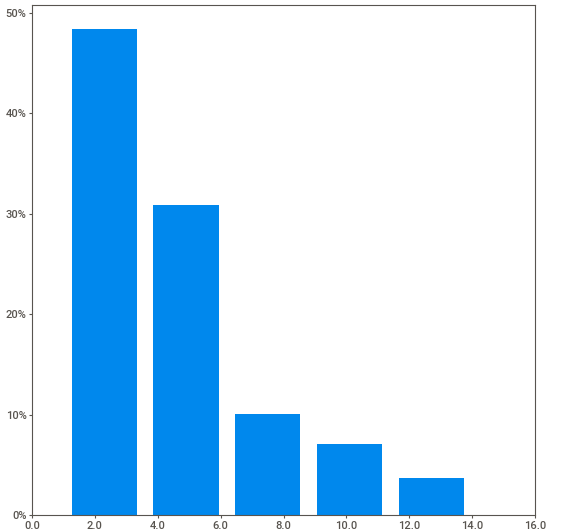
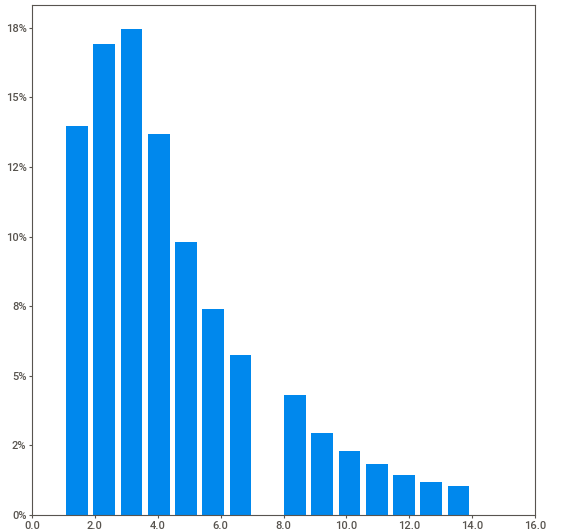
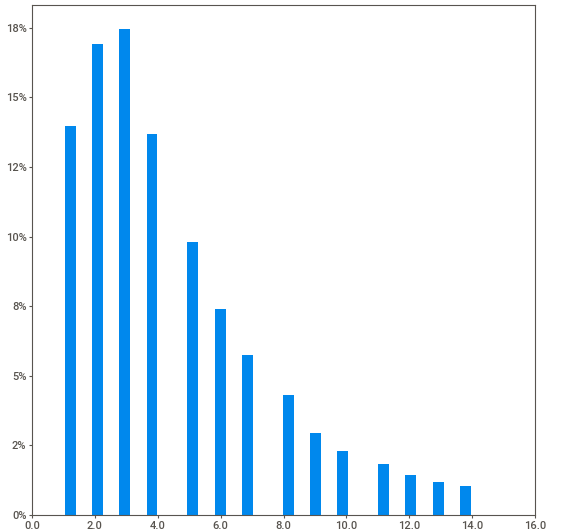
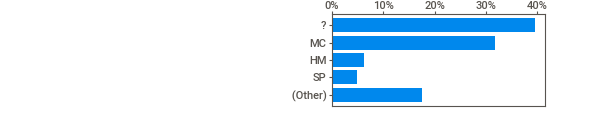
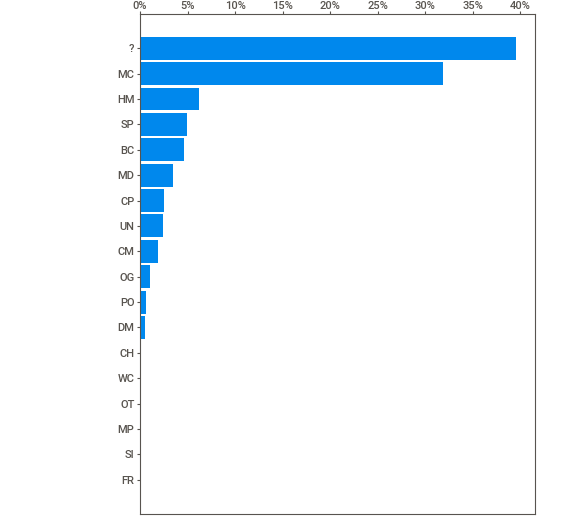
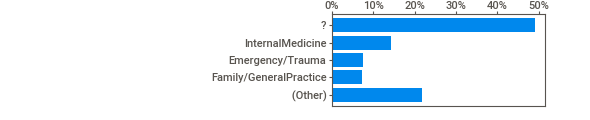
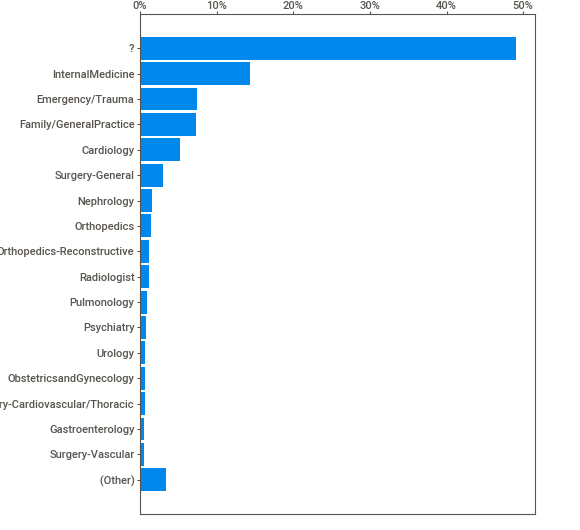
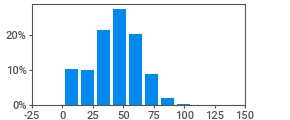
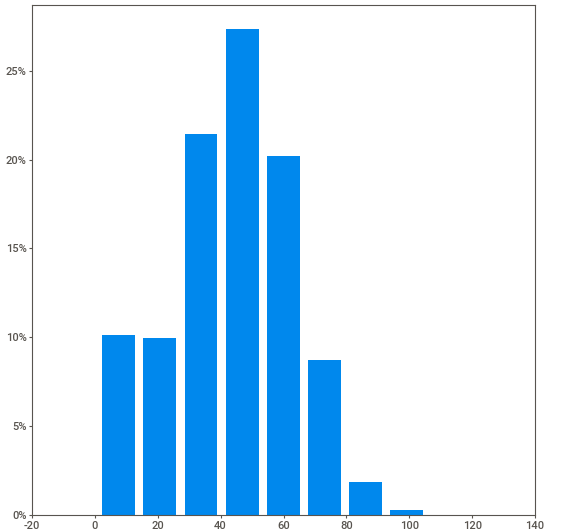
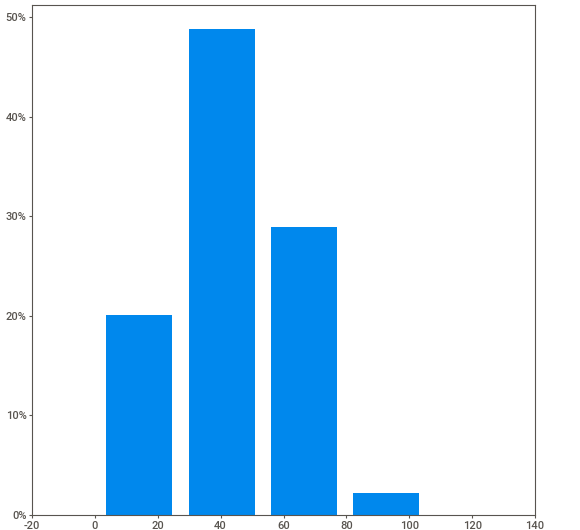
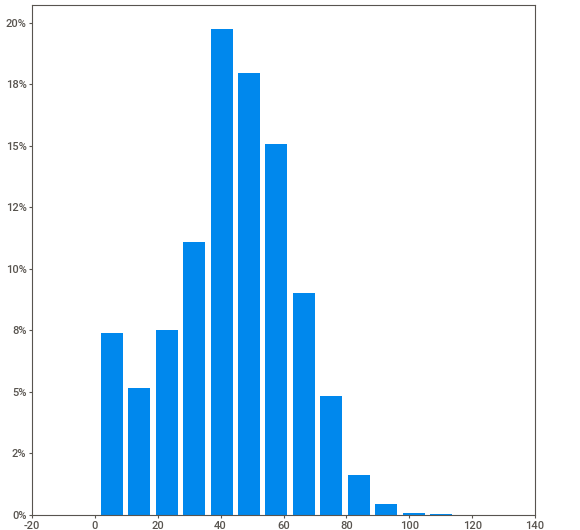
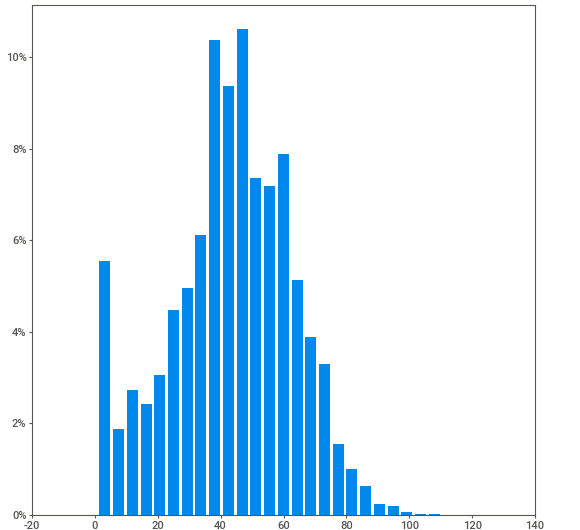
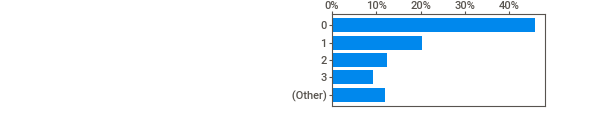
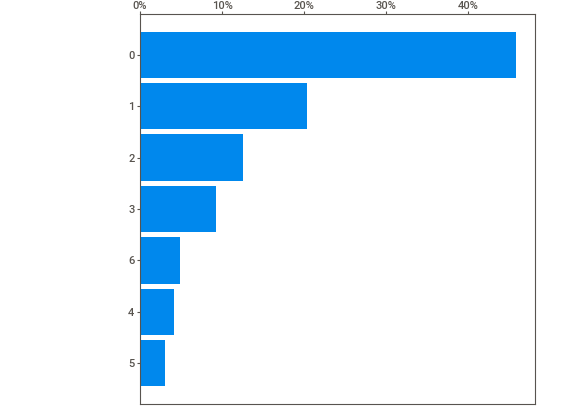
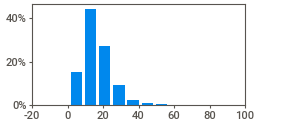
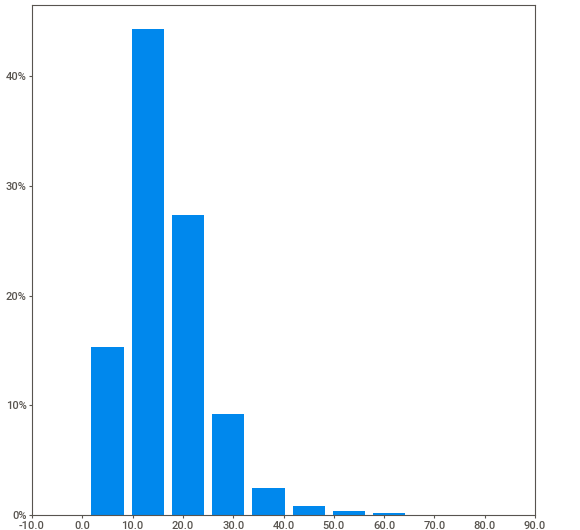
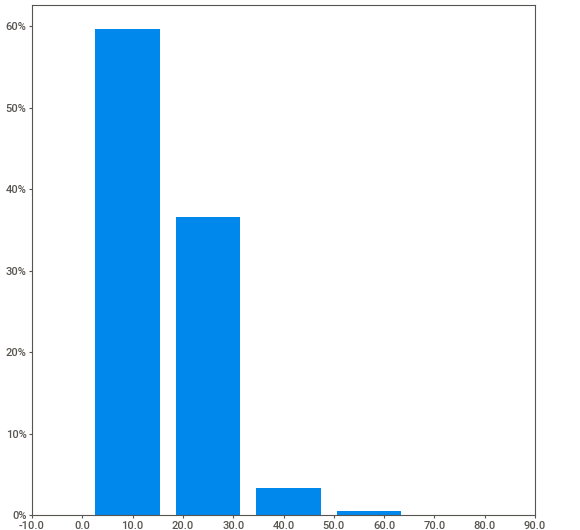
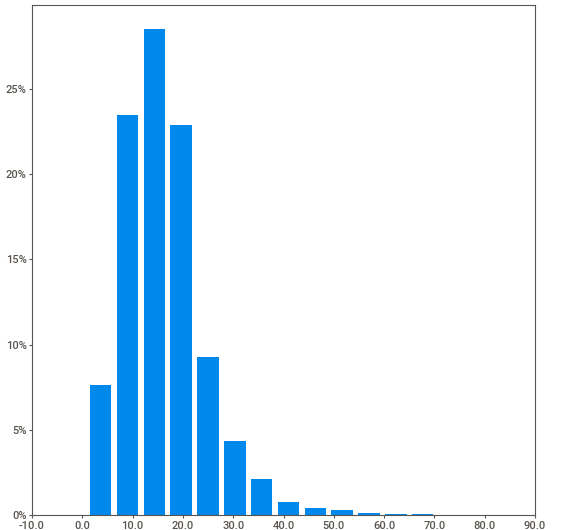
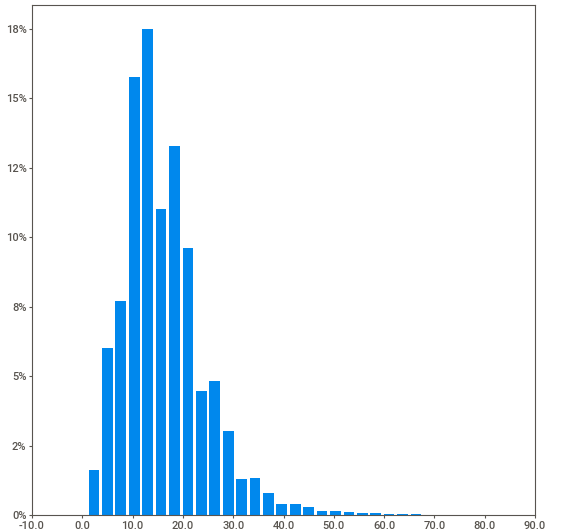
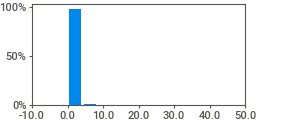
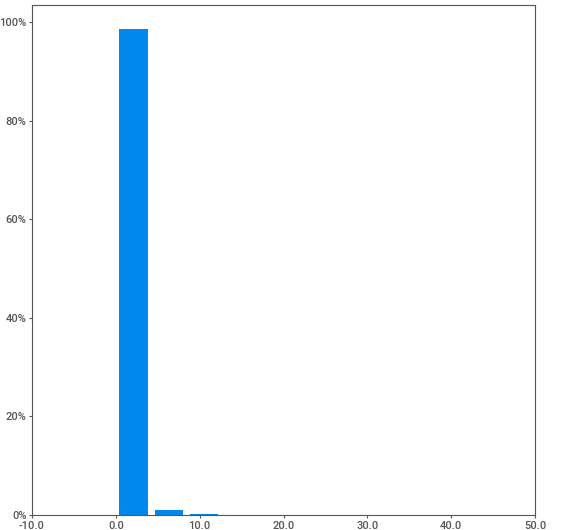
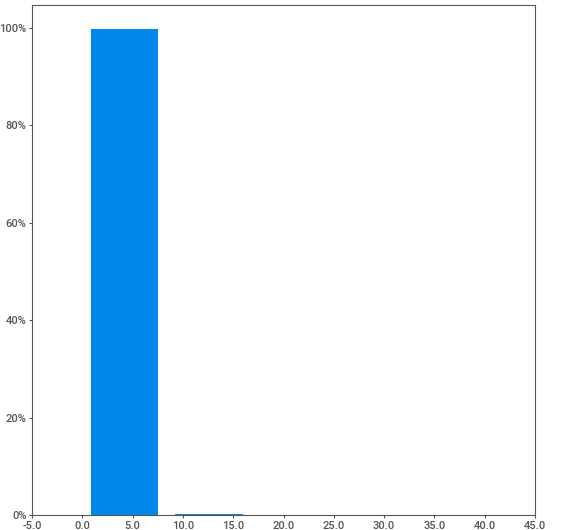
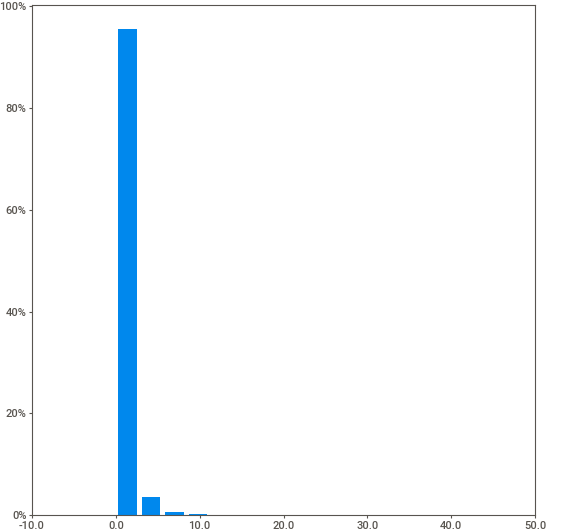
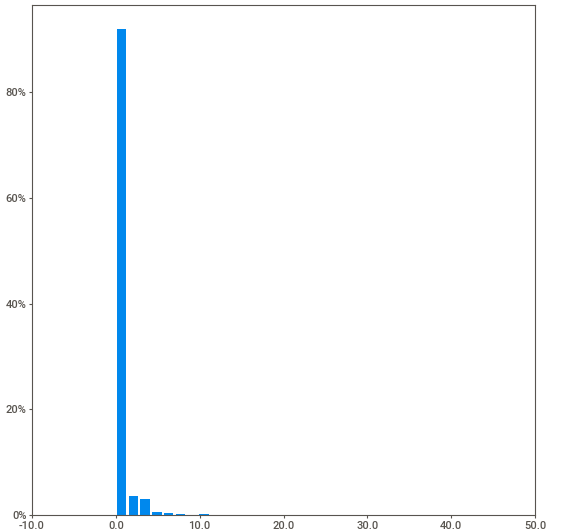
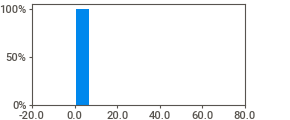
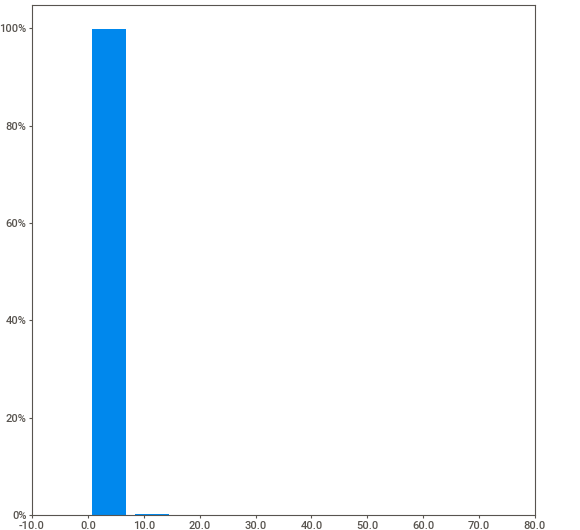
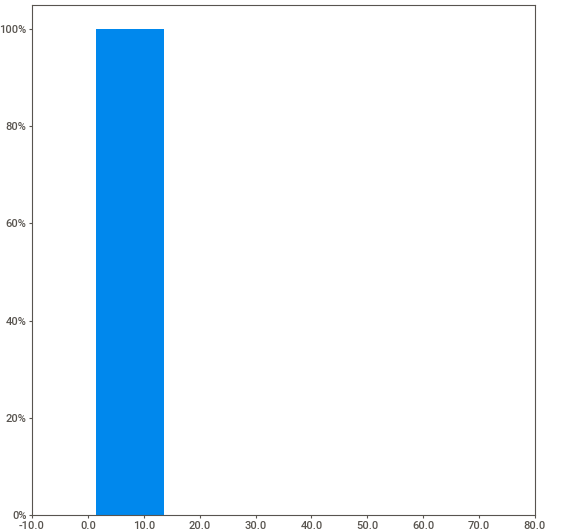
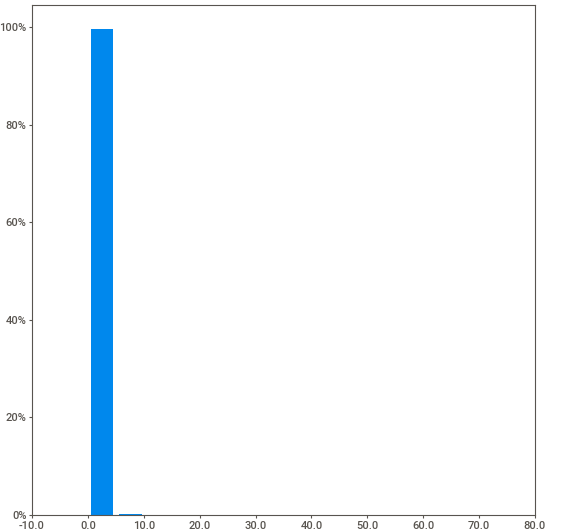
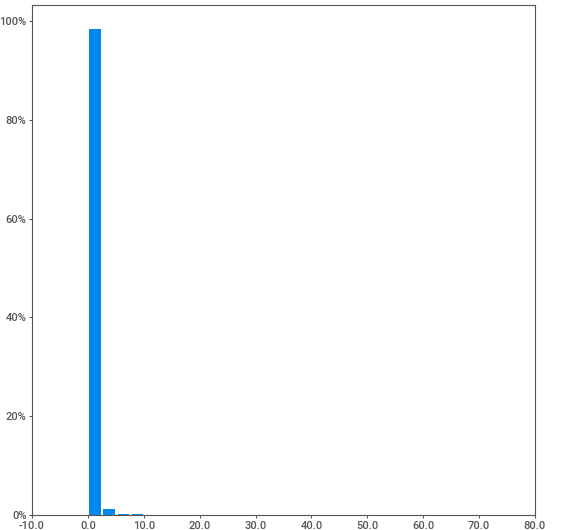
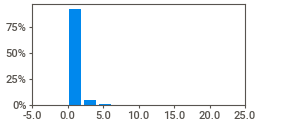
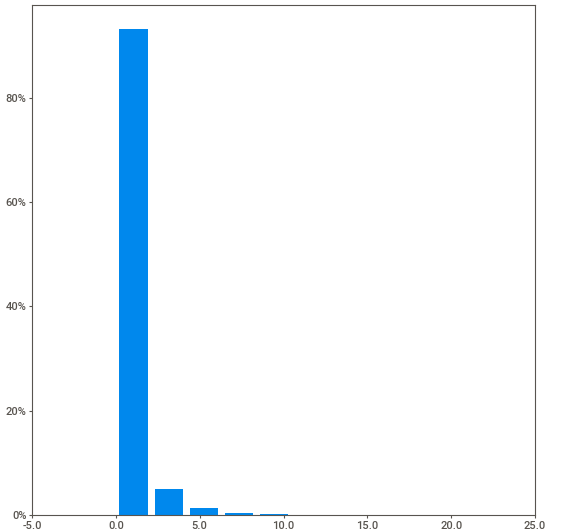
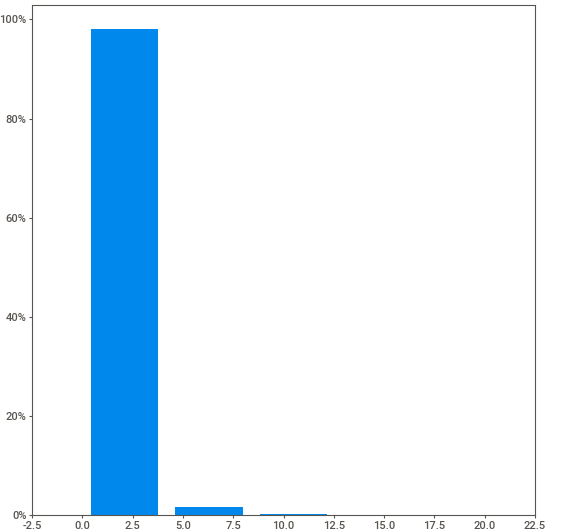
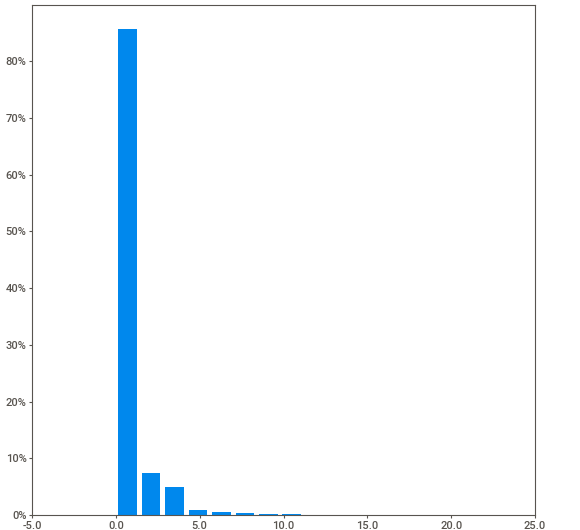
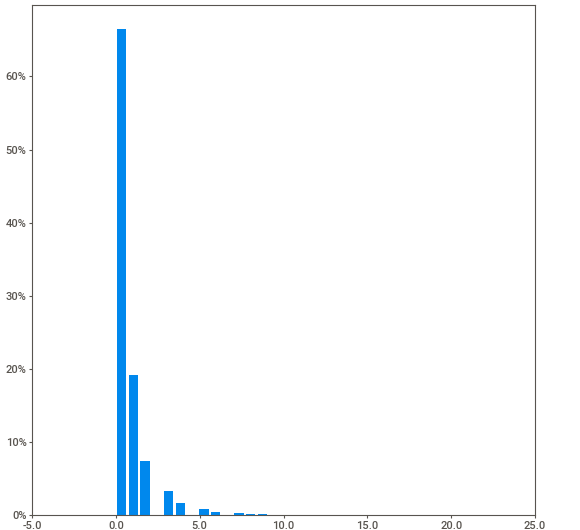
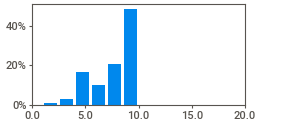
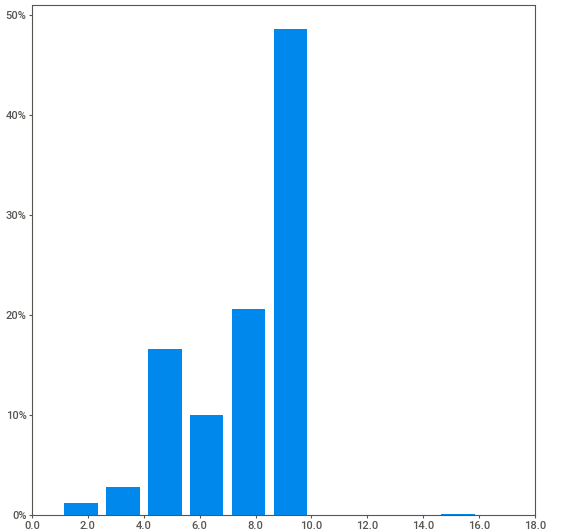
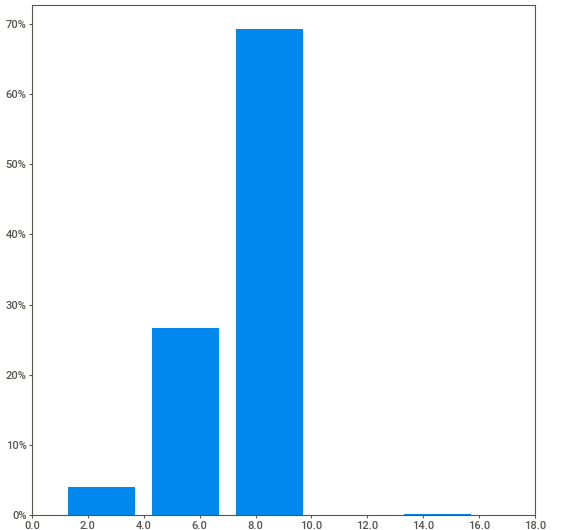
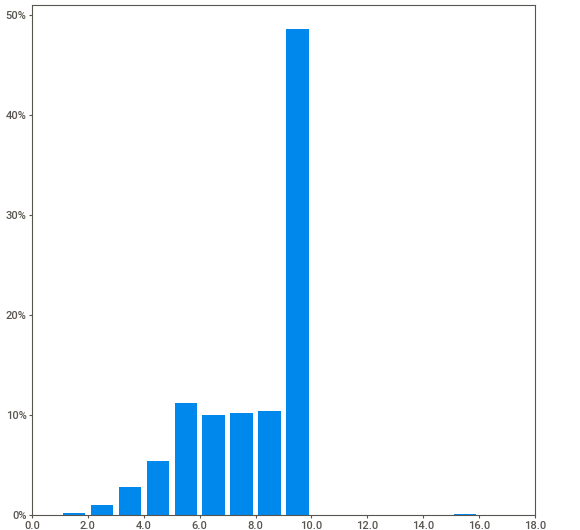
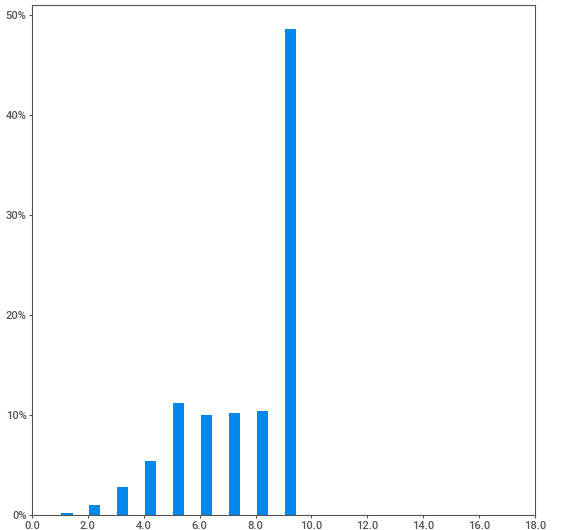
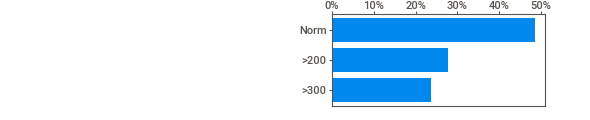
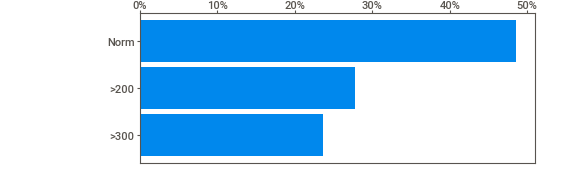
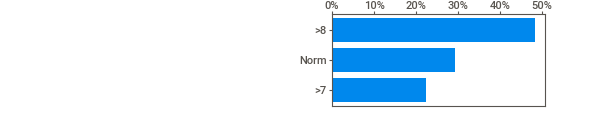
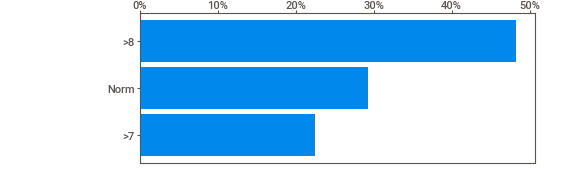
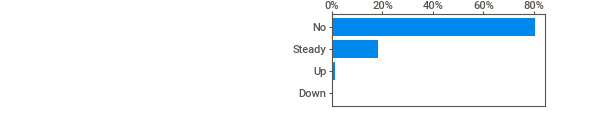
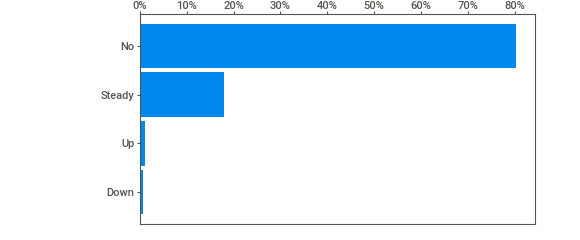
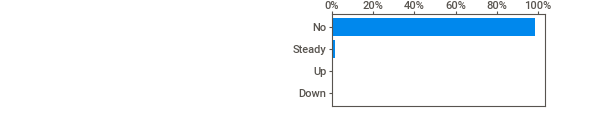
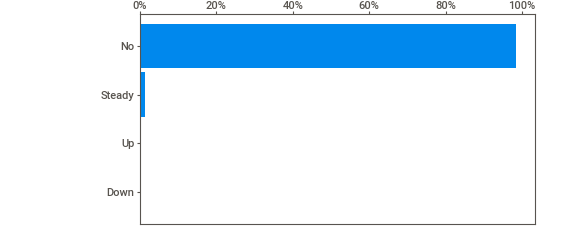
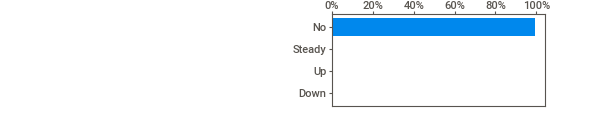
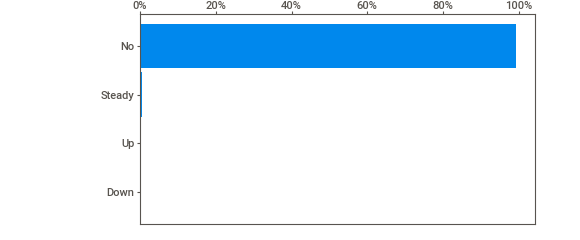
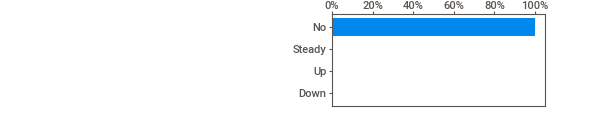
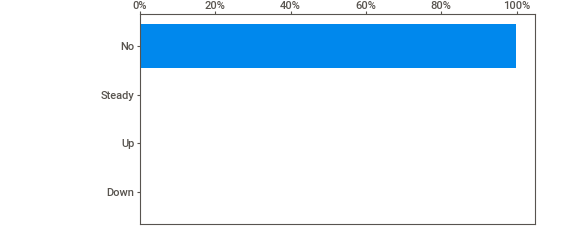
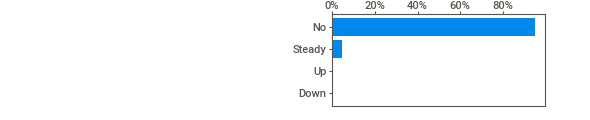
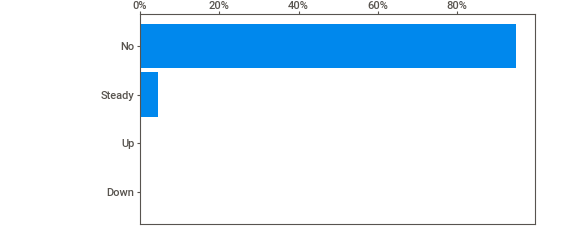
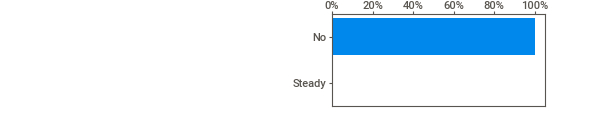
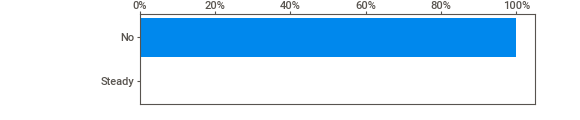
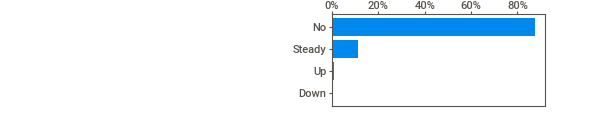
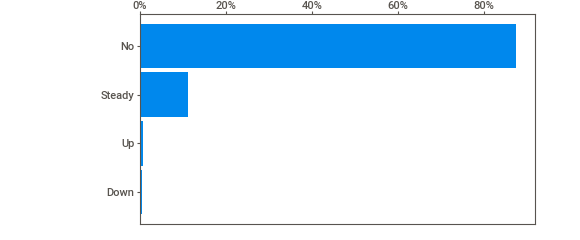
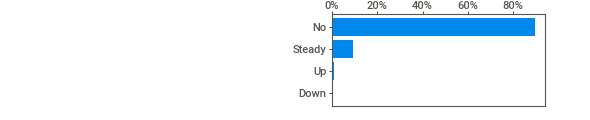
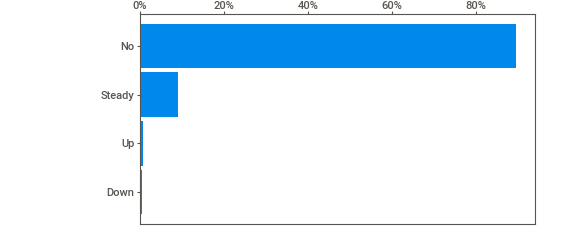
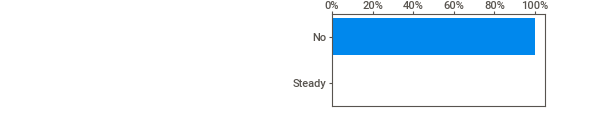
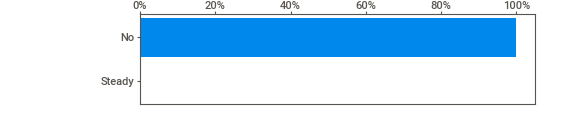
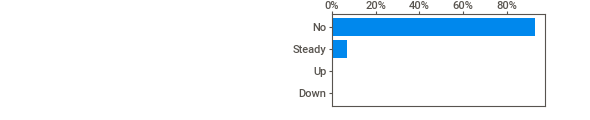
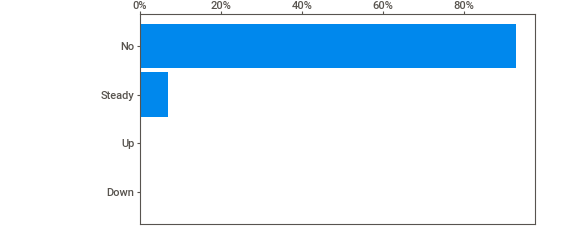
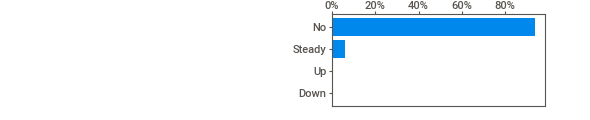
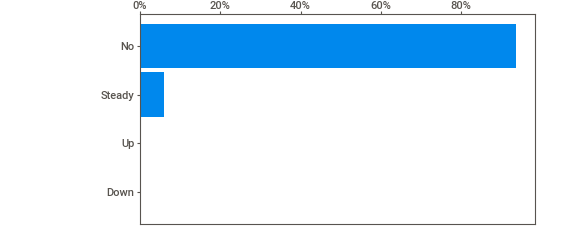
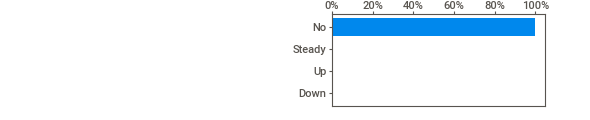
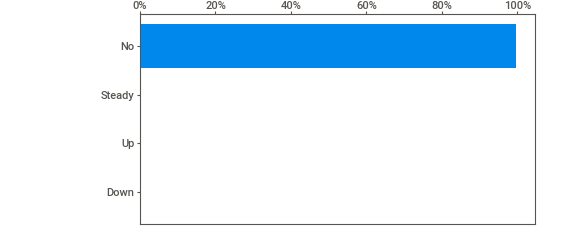
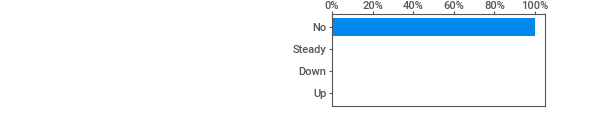
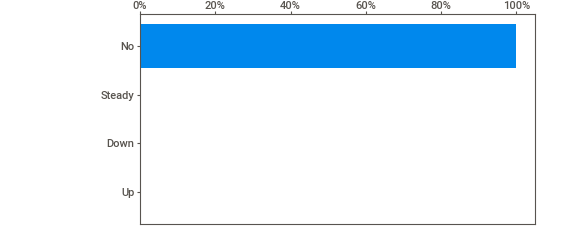
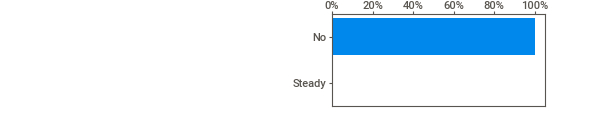
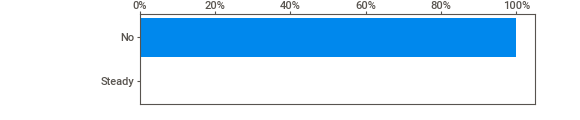
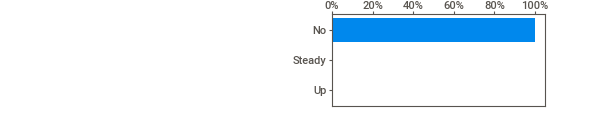
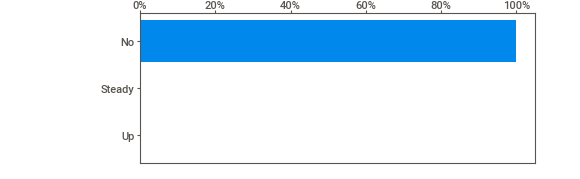
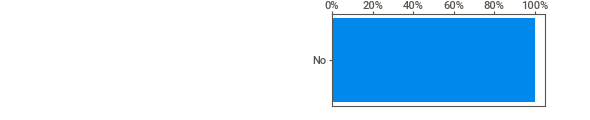
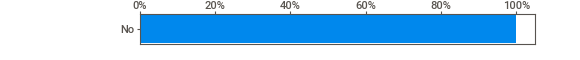
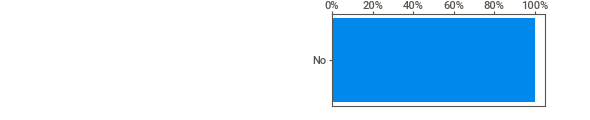
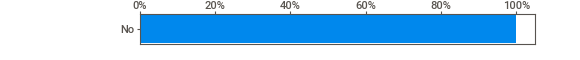
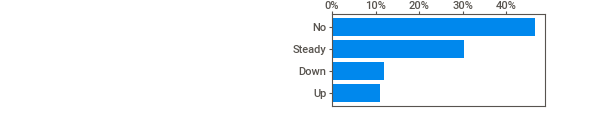
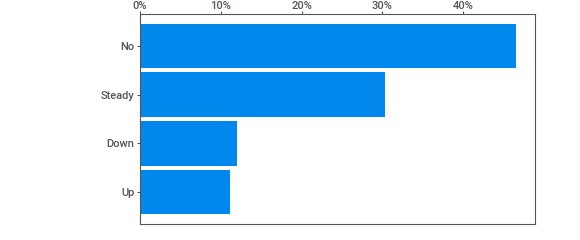
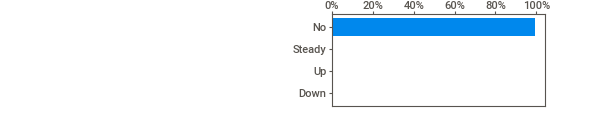
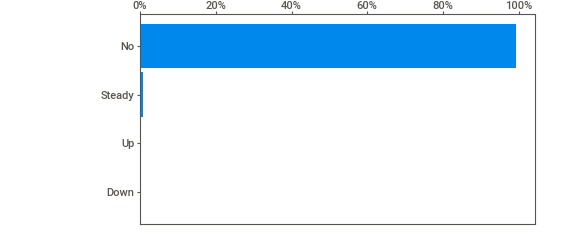
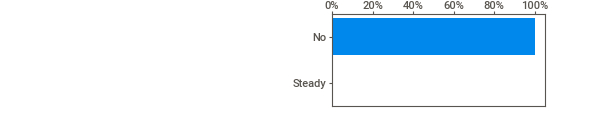
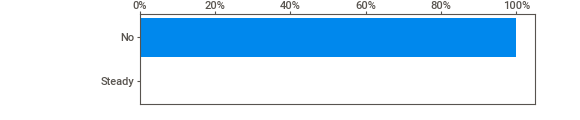
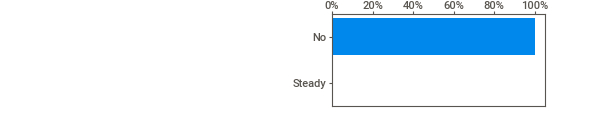
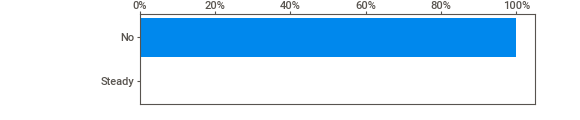
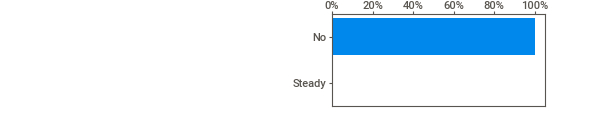
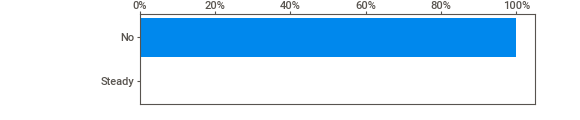
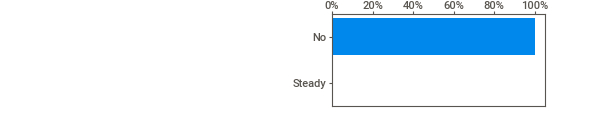
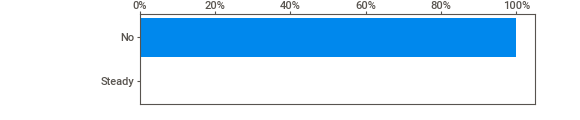
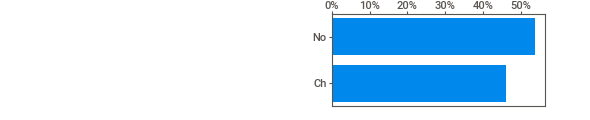
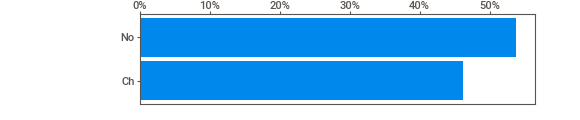
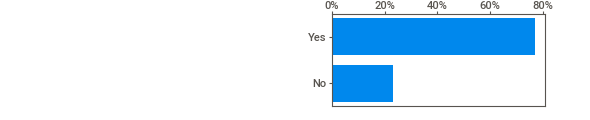
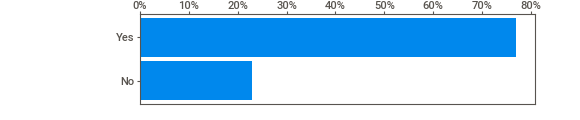
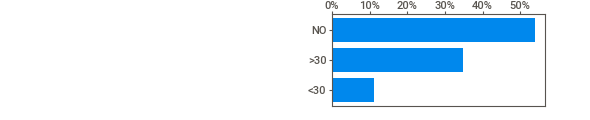
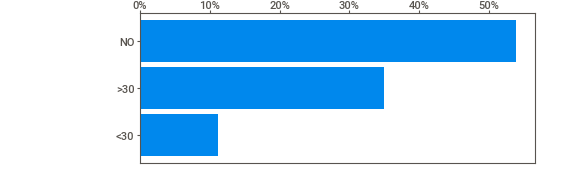
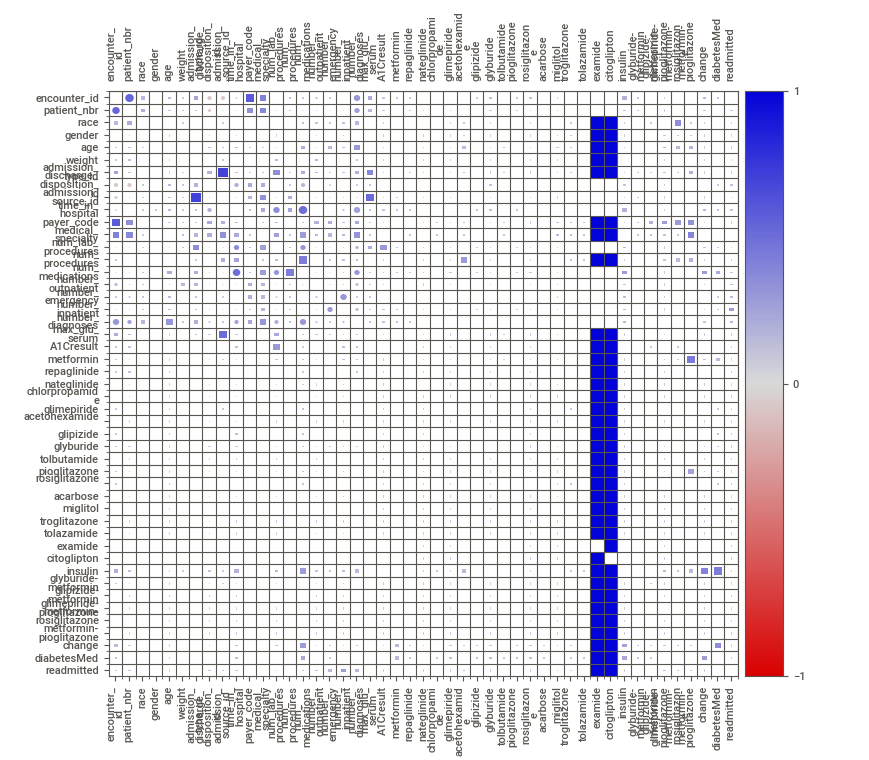
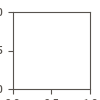

In [16]:

# Now you can use the report object
report.show_notebook()


### I got interested to see what other data profiling packages were out there and found another good one with its own advantages, dtale. 


In [19]:
# !pip install dtale
import dtale
# Start the D-Tale server
dtale.show(df)


### 49 features, 1 target, (101766 rows, 50 columns)


In [4]:
print(df.shape)
print(df.columns)

(101766, 50)
Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [5]:
import pandas as pd

unique_values = pd.DataFrame(columns=['Column', 'Unique Values'])

for col in df.columns:
    nunique = df[col].nunique()
    value_counts = df[col].value_counts().to_string()
    new_df = pd.DataFrame({'Column': [col], 'Unique Values': [nunique]}) #
    unique_values = pd.concat([unique_values, new_df], ignore_index=True)

# unique_values
unique_values.head(10)


Column Unique Values
0              encounter_id        101766
1               patient_nbr         71518
2                      race             6
3                    gender             3
4                       age            10
5                    weight            10
6         admission_type_id             8
7  discharge_disposition_id            26
8       admission_source_id            17
9          time_in_hospital            14

In [6]:
# print(df.isnull().sum())
pd.DataFrame(df.isnull().sum(), columns=['Missing Values'])



Missing Values
encounter_id                           0
patient_nbr                            0
race                                   0
gender                                 0
age                                    0
weight                                 0
admission_type_id                      0
discharge_disposition_id               0
admission_source_id                    0
time_in_hospital                       0
payer_code                             0
medical_specialty                      0
num_lab_procedures                     0
num_procedures                         0
num_medications                        0
number_outpatient                      0
number_emergency                       0
number_inpatient                       0
diag_1                                 0
diag_2                                 0
diag_3                                 0
number_diagnoses                       0
max_glu_serum                      96420
A1Cresult                          84748
metformin                              0
repaglinide                            0
nateglinide                            0
chlorpropamide                         0
glimepiride                            0
acetohexamide                          0
glipizide                              0
glyburide                              0
tolbutamide                            0
pioglitazone                           0
rosiglitazone                          0
acarbose                               0
miglitol                               0
troglitazone                           0
tolazamide                             0
examide                                0
citoglipton                            0
insulin                                0
glyburide-metformin                    0
glipizide-metformin                    0
glimepiride-pioglitazone               0
metformin-rosiglitazone                0
metformin-pioglitazone                 0
change                                 0
diabetesMed                            0
readmitted                             0

In [7]:
# print(df.dtypes)
pd.DataFrame(df.dtypes, columns=['Data Type'])

Data Type
encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone                object
rosiglitazone               object
acarbose                    object
miglitol                    object
troglitazone                object
tolazamide                  object
examide                     object
citoglipton                 object
insulin                     object
glyburide-metformin         object
glipizide-metformin         object
glimepiride-pioglitazone    object
metformin-rosiglitazone     object
metformin-pioglitazone      object
change                      object
diabetesMed                 object
readmitted                  object

In [8]:
pd.DataFrame(df.dtypes.value_counts()) # 37 objects, 13 integers 

count
object     37
int64      13

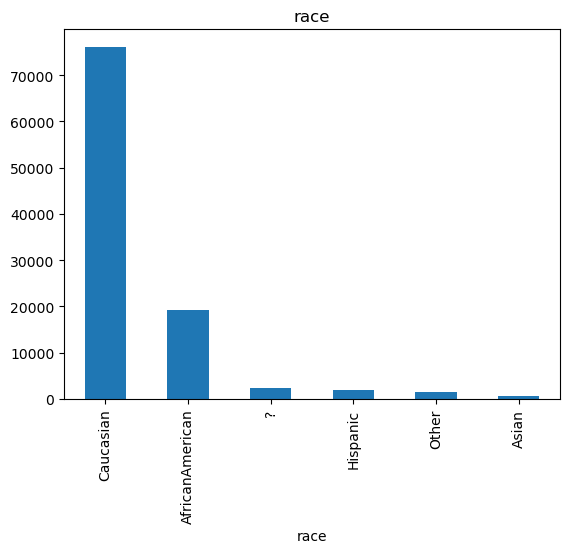

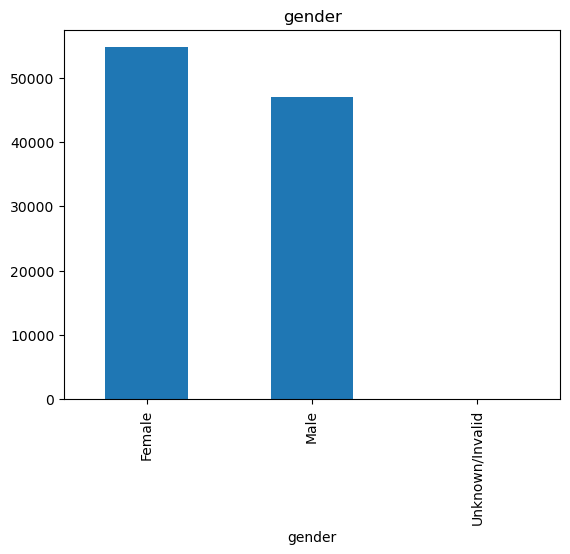

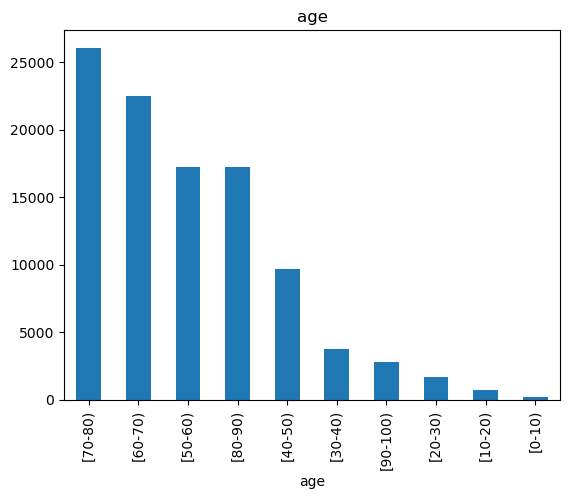

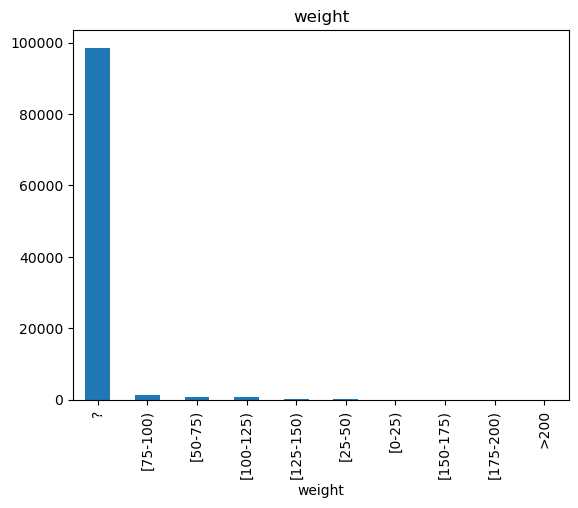

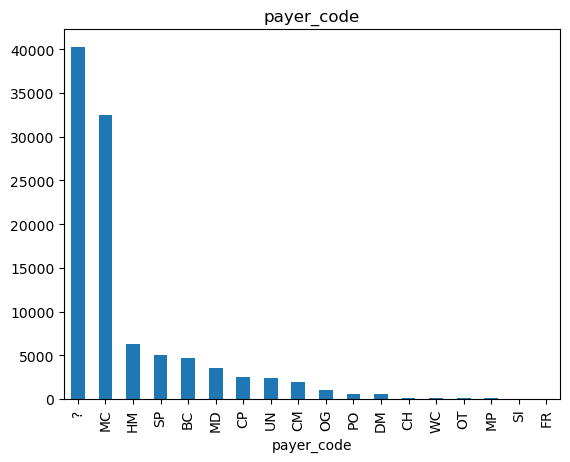

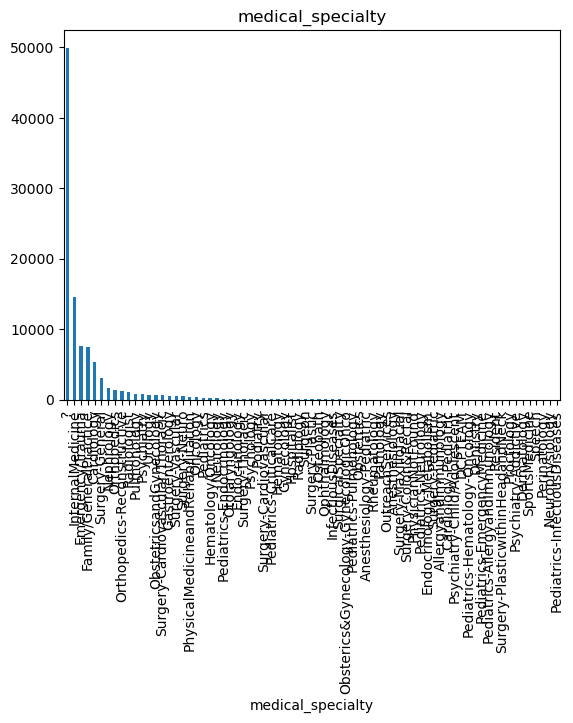

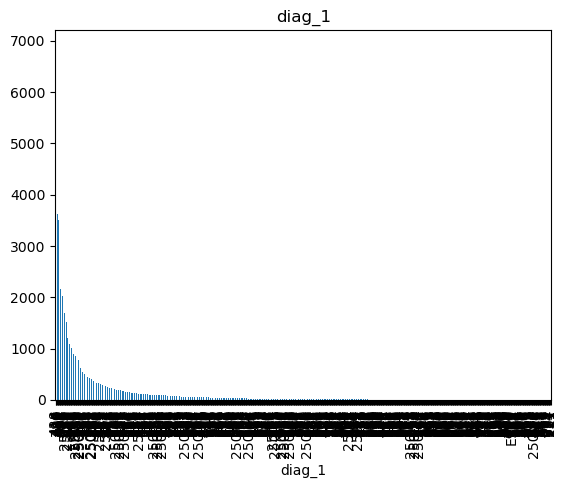

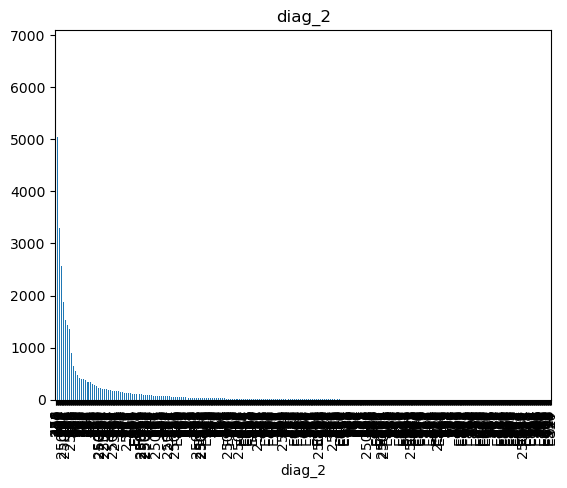

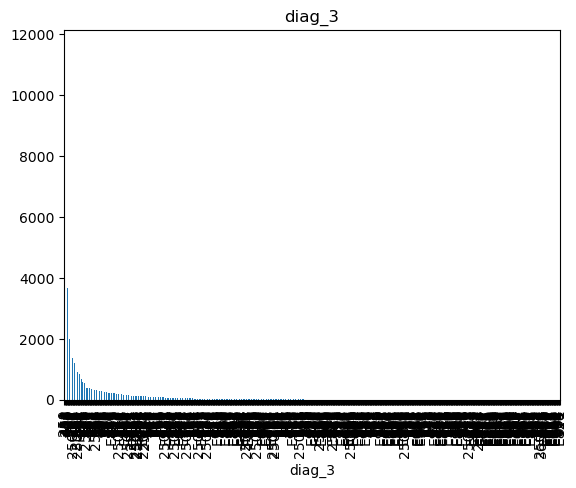

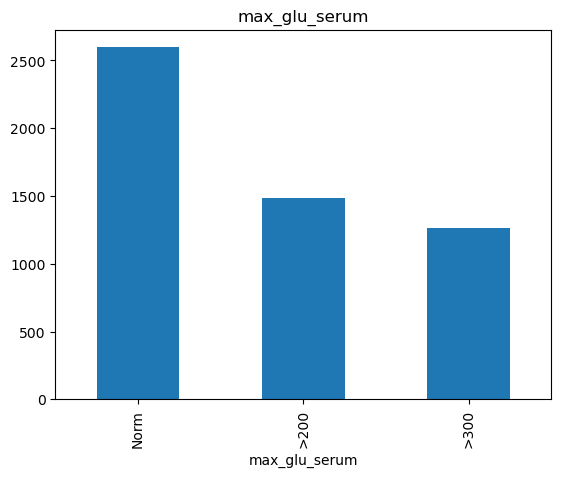

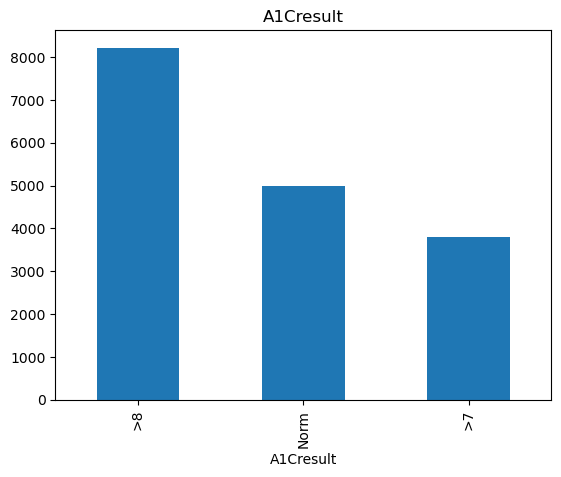

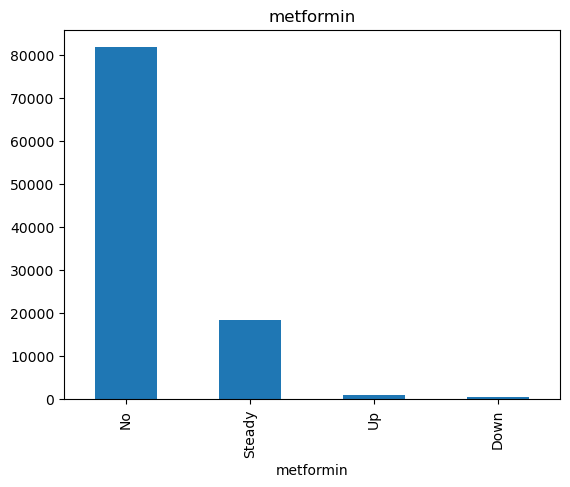

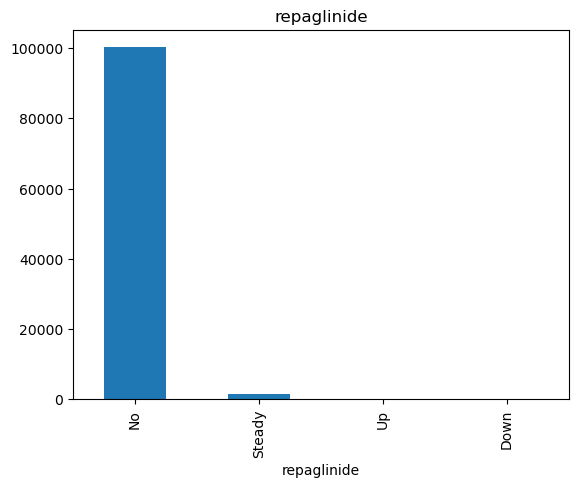

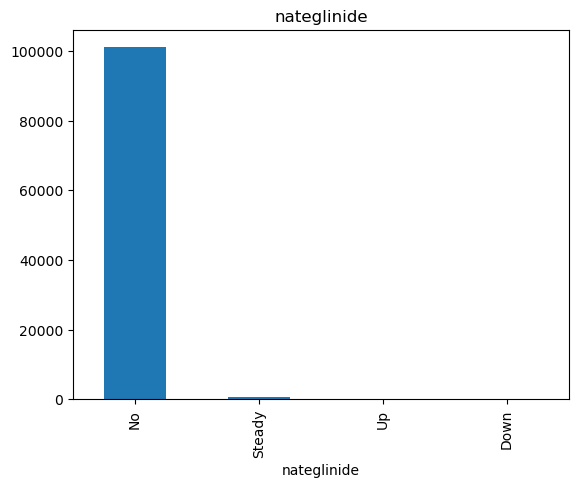

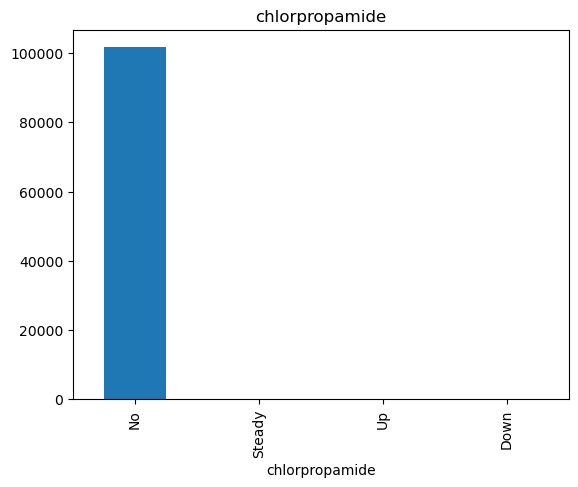

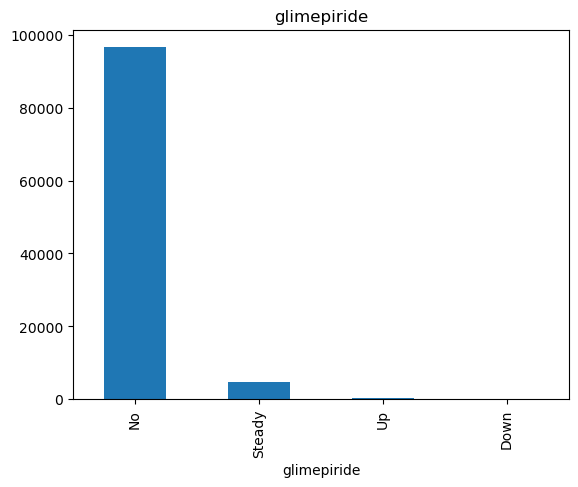

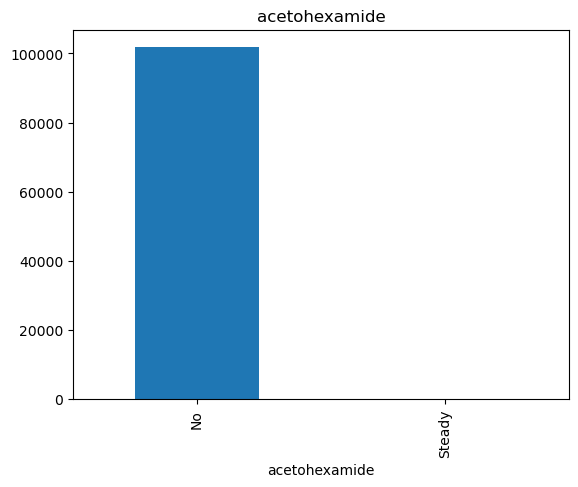

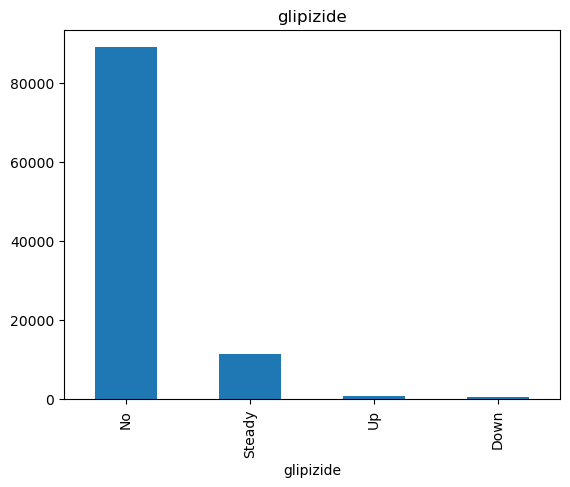

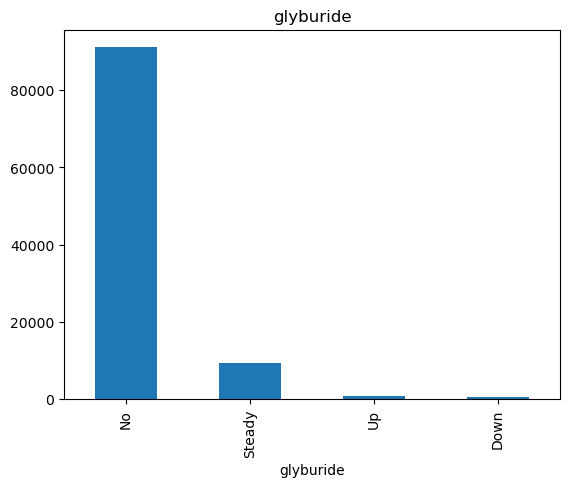

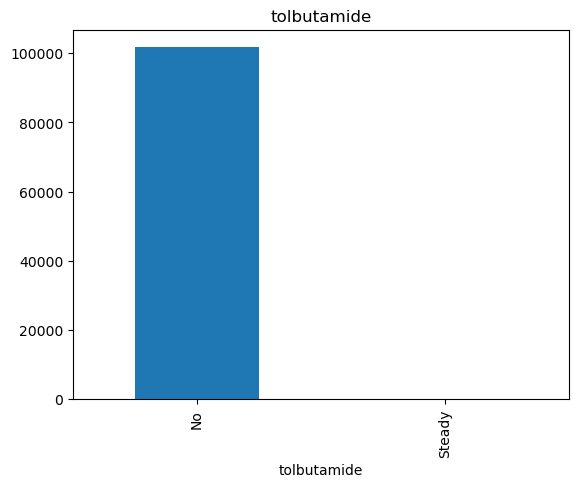

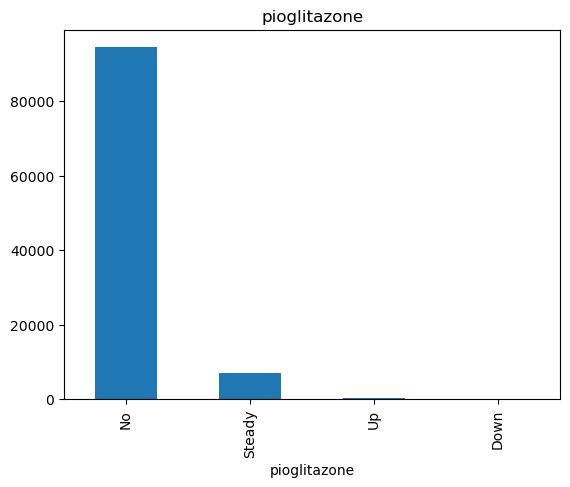

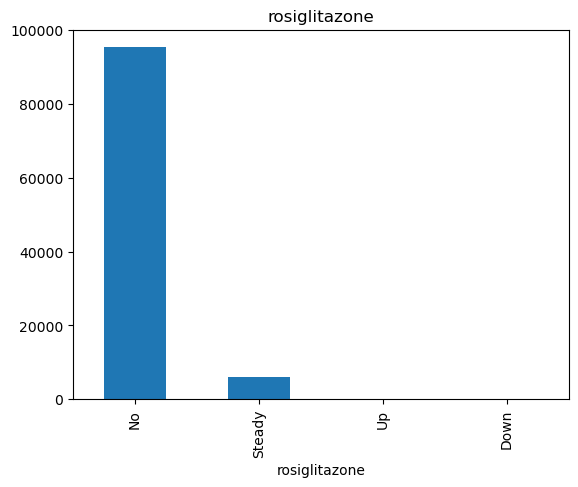

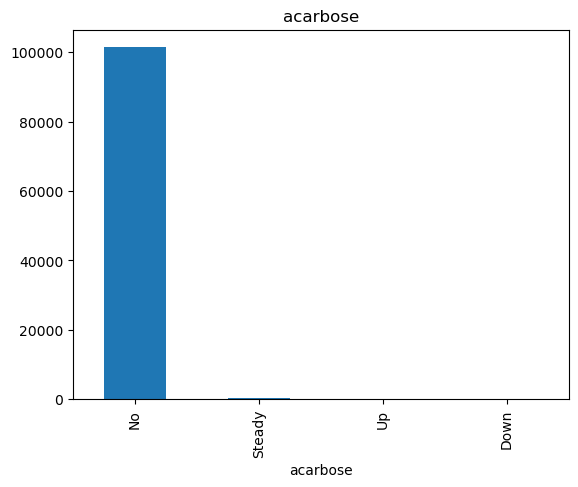

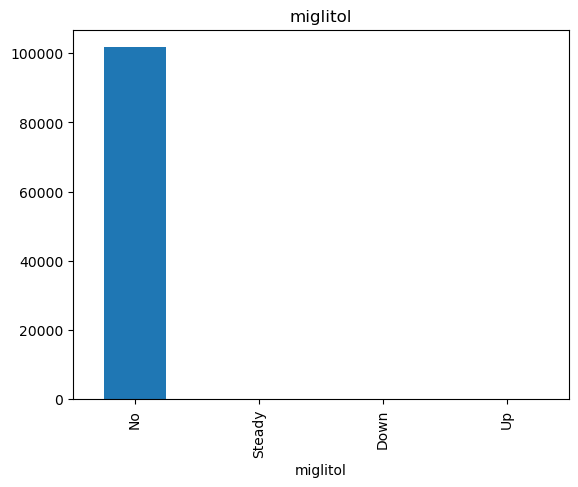

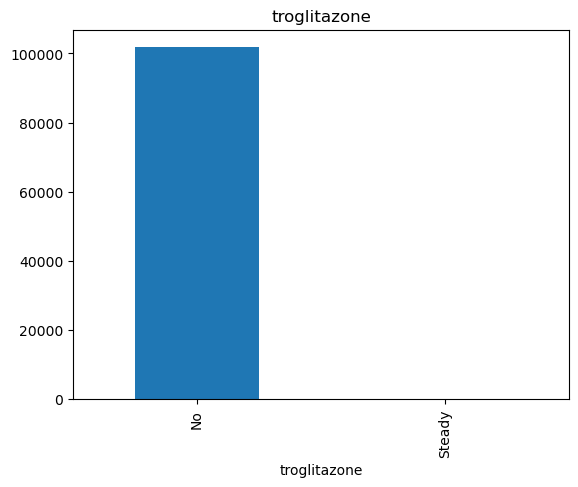

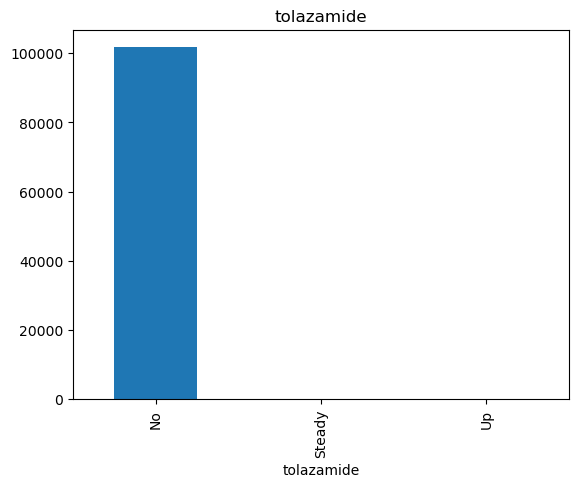

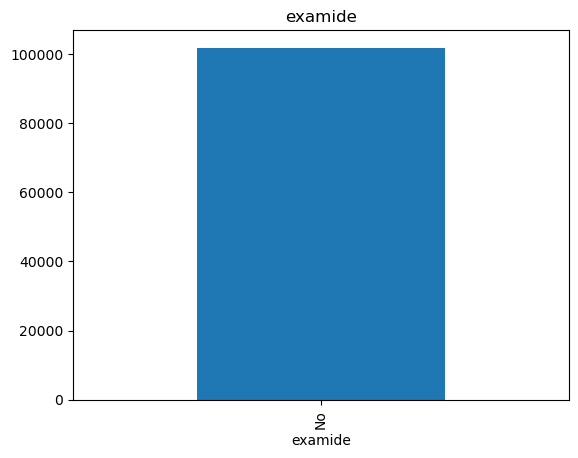

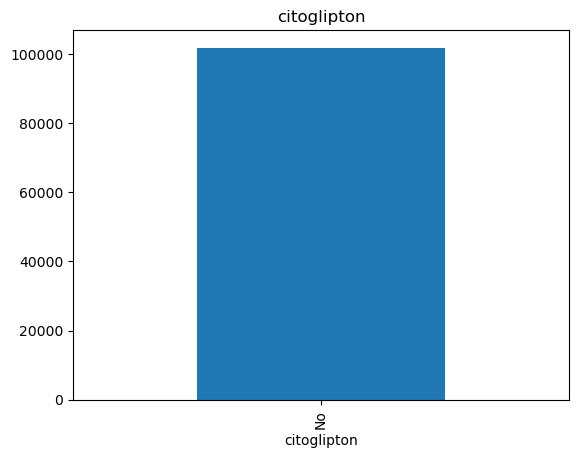

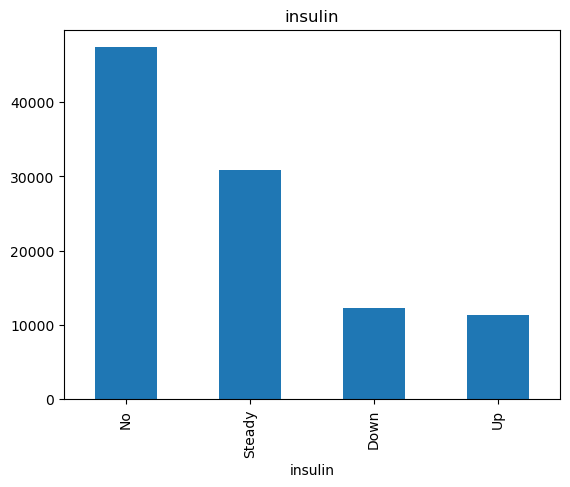

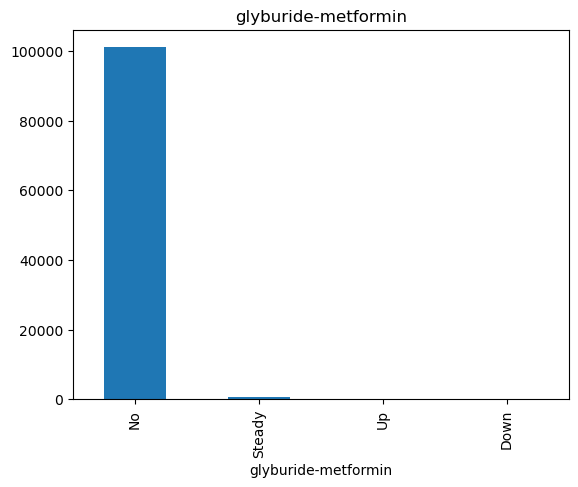

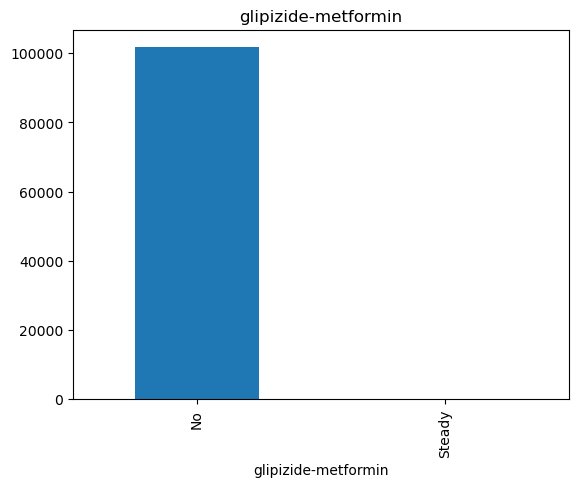

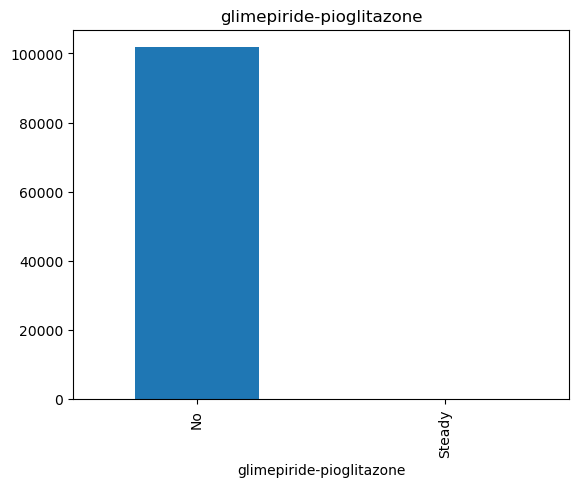

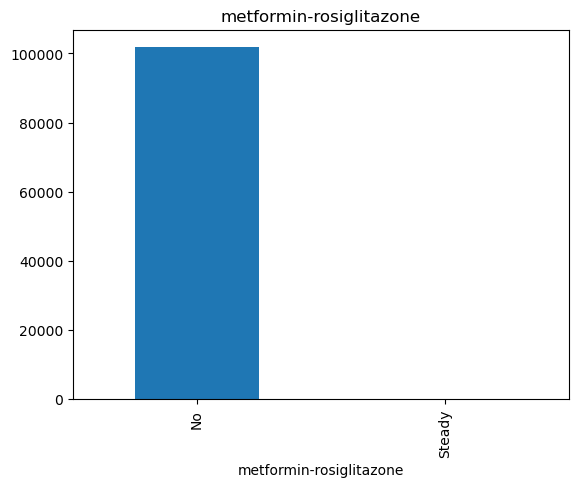

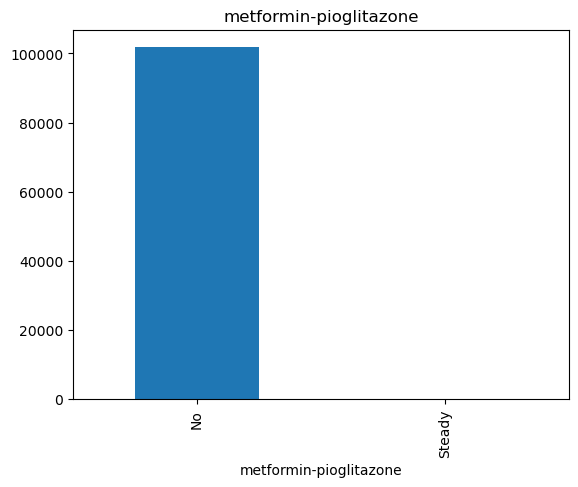

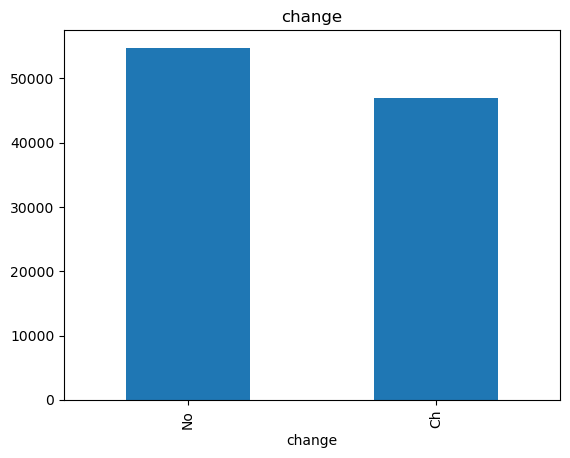

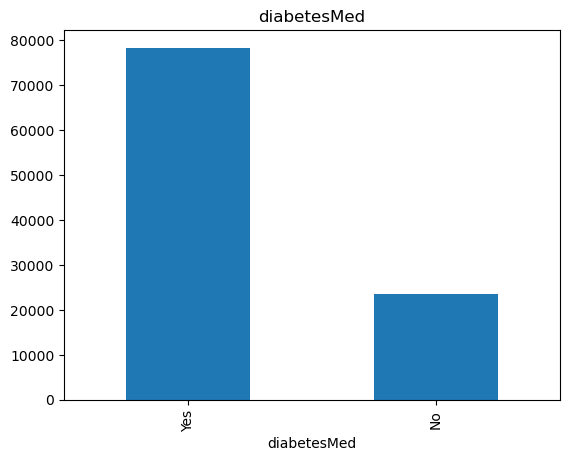

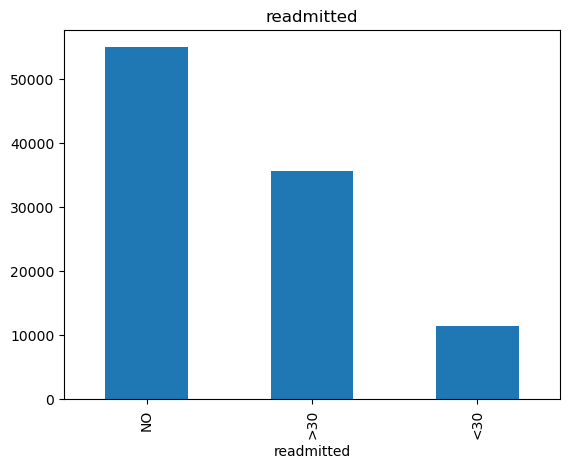

In [9]:
# print out columns names with object data types sorted 
# print(df.select_dtypes(include='object').columns)
# print in nice professional format
pd.DataFrame(df.select_dtypes(include='object').columns, columns=['object columns'])
# bar chart of unique values for object columns 
object_columns = df.select_dtypes(include='object').columns
# now plot the unique values for each object column
for col in object_columns:
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()



In [10]:
# found a package I liked at work to do quick EDA Profiling the results are usually decent. 

# !pip uninstall pandas-profiling -y
# !pip uninstall pydantic -y

# !pip install pandas-profiling==3.1.0
# !pip install pydantic==1.10.2

Found existing installation: pandas-profiling 3.1.0
Uninstalling pandas-profiling-3.1.0:
  Successfully uninstalled pandas-profiling-3.1.0
Found existing installation: pydantic 1.10.2
Uninstalling pydantic-1.10.2:
  Successfully uninstalled pydantic-1.10.2
  Obtaining dependency information for pandas-profiling==3.1.0 from https://files.pythonhosted.org/packages/b8/bb/7d1a8523711c7022601d17a8449b822dc5ffaf272692d3538771b0538631/pandas_profiling-3.1.0-py2.py3-none-any.whl.metadata
  Using cached pandas_profiling-3.1.0-py2.py3-none-any.whl.metadata (23 kB)
  Obtaining dependency information for pydantic>=1.8.1 from https://files.pythonhosted.org/packages/ed/76/9a17032880ed27f2dbd490c77a3431cbc80f47ba81534131de3c2846e736/pydantic-2.7.1-py3-none-any.whl.metadata
  Using cached pydantic-2.7.1-py3-none-any.whl.metadata (107 kB)
Using cached pandas_profiling-3.1.0-py2.py3-none-any.whl (261 kB)
Using cached pydantic-2.7.1-py3-none-any.whl (409 kB)
ERROR: pip's dependency resolver does not curr

In [12]:
from pandas_profiling import ProfileReport
from pydantic import BaseSettings

ImportError: cannot import name 'DataError' from 'pandas.core.base' (/Users/tmc/opt/anaconda3/envs/PythonData/lib/python3.11/site-packages/pandas/core/base.py)

In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport
from pydantic_settings import BaseSettings
# # Generate the profiling report
# profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

# # To display the report in a Jupyter Notebook
# profile.to_notebook_iframe()

# # Or save the report to an HTML file
# profile.to_file("pandas_profiling_report.html")

PydanticImportError: `BaseSettings` has been moved to the `pydantic-settings` package. See https://docs.pydantic.dev/2.5/migration/#basesettings-has-moved-to-pydantic-settings for more details.

For further information visit https://errors.pydantic.dev/2.5/u/import-error

In [ ]:
# print only these columns .loc df.select_dtypes(include='object').columns print out the first 5 rows of the columns
df.loc[:, df.select_dtypes(include='object').columns].head()
# count number of unique values in each column
df.select_dtypes(include='object').nunique()

Index(['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty',
       'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


race                          6
gender                        3
age                          10
weight                       10
payer_code                   18
medical_specialty            73
diag_1                      717
diag_2                      749
diag_3                      790
max_glu_serum                 3
A1Cresult                     3
metformin                     4
repaglinide                   4
nateglinide                   4
chlorpropamide                4
glimepiride                   4
acetohexamide                 2
glipizide                     4
glyburide                     4
tolbutamide                   2
pioglitazone                  4
rosiglitazone                 4
acarbose                      4
miglitol                      4
troglitazone                  2
tolazamide                    3
examide                       1
citoglipton                   1
insulin                       4
glyburide-metformin           4
glipizide-metformin           2
glimepir

In [ ]:
# print out columns names with object data types sorted 
print(df.select_dtypes(include='int64').columns)
# look at first five rows of the .loc df.select_dtypes(include='int64').columns columns
print(df.loc[:, df.select_dtypes(include='int64').columns].head())
# count number of unique values in each column
print(df.select_dtypes(include='int64').nunique())

Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses'],
      dtype='object')
   encounter_id  patient_nbr  admission_type_id  discharge_disposition_id  \
0       2278392      8222157                  6                        25   
1        149190     55629189                  1                         1   
2         64410     86047875                  1                         1   
3        500364     82442376                  1                         1   
4         16680     42519267                  1                         1   

   admission_source_id  time_in_hospital  num_lab_procedures  num_procedures  \
0                    1                 1                  41               0   
1                    7                 3                

In [ ]:
# describe the columns
df.select_dtypes(include='int64').describe()


encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.000000          4.000000   
75%                    4.000000             7.000000          6.000000   
max                   28.000000            25.000000         14.000000   

       num_lab_procedures  num_procedures  num_medications  number_outpatient  \
count       101766.000000   101766.000000    101766.000000      101766.000000   
mean            43.095641        1.339730        16.021844           0.369357   
std             19.674362        1.705807         8.127566           1.267265   
min              1.000000        0.000000         1.000000           0.000000   
25%             31.000000        0.000000        10.000000           0.000000   
50%             44.000000        1.000000        15.000000           0.000000   
75%             57.000000        2.000000        20.000000           0.000000   
max            132.000000        6.000000        81.000000          42.000000   

       number_emergency  number_inpatient  number_diagnoses  
count     101766.000000     101766.000000     101766.000000  
mean           0.197836          0.635566          7.422607  
std            0.930472          1.262863          1.933600  
min            0.000000          0.000000          1.000000  
25%            0.000000          0.000000          6.000000  
50%            0.000000          0.000000          8.000000  
75%            0.000000          1.000000          9.000000  
max           76.000000         21.000000         16.000000

In [ ]:
df.select_dtypes(include='int64').corr()

encounter_id  patient_nbr  admission_type_id  \
encounter_id                  1.000000     0.512028          -0.158961   
patient_nbr                   0.512028     1.000000          -0.011128   
admission_type_id            -0.158961    -0.011128           1.000000   
discharge_disposition_id     -0.132876    -0.136814           0.083483   
admission_source_id          -0.112402    -0.032568           0.106654   
time_in_hospital             -0.062221    -0.024092          -0.012500   
num_lab_procedures           -0.026062     0.015946          -0.143713   
num_procedures               -0.014225    -0.015570           0.129888   
num_medications               0.076113     0.020665           0.079535   
number_outpatient             0.103756     0.103379           0.026511   
number_emergency              0.082803     0.062352          -0.019116   
number_inpatient              0.030962     0.012480          -0.038161   
number_diagnoses              0.265149     0.226847          -0.117126   

                          discharge_disposition_id  admission_source_id  \
encounter_id                             -0.132876            -0.112402   
patient_nbr                              -0.136814            -0.032568   
admission_type_id                         0.083483             0.106654   
discharge_disposition_id                  1.000000             0.018193   
admission_source_id                       0.018193             1.000000   
time_in_hospital                          0.162748            -0.006965   
num_lab_procedures                        0.023415             0.048885   
num_procedures                            0.015921            -0.135400   
num_medications                           0.108753            -0.054533   
number_outpatient                        -0.008715             0.027244   
number_emergency                         -0.024471             0.059892   
number_inpatient                          0.020787             0.036314   
number_diagnoses                          0.046891             0.072114   

                          time_in_hospital  num_lab_procedures  \
encounter_id                     -0.062221           -0.026062   
patient_nbr                      -0.024092            0.015946   
admission_type_id                -0.012500           -0.143713   
discharge_disposition_id          0.162748            0.023415   
admission_source_id              -0.006965            0.048885   
time_in_hospital                  1.000000            0.318450   
num_lab_procedures                0.318450            1.000000   
num_procedures                    0.191472            0.058066   
num_medications                   0.466135            0.268161   
number_outpatient                -0.008916           -0.007602   
number_emergency                 -0.009681           -0.002279   
number_inpatient                  0.073623            0.039231   
number_diagnoses                  0.220186            0.152773   

                          num_procedures  num_medications  number_outpatient  \
encounter_id                   -0.014225         0.076113           0.103756   
patient_nbr                    -0.015570         0.020665           0.103379   
admission_type_id               0.129888         0.079535           0.026511   
discharge_disposition_id        0.015921         0.108753          -0.008715   
admission_source_id            -0.135400        -0.054533           0.027244   
time_in_hospital                0.191472         0.466135          -0.008916   
num_lab_procedures              0.058066         0.268161          -0.007602   
num_procedures                  1.000000         0.385767          -0.024819   
num_medications                 0.385767         1.000000           0.045197   
number_outpatient              -0.024819         0.045197           1.000000   
number_emergency               -0.038179         0.013180           0.091459   
number_inpatient               -0.066236         0.06

<Axes: >

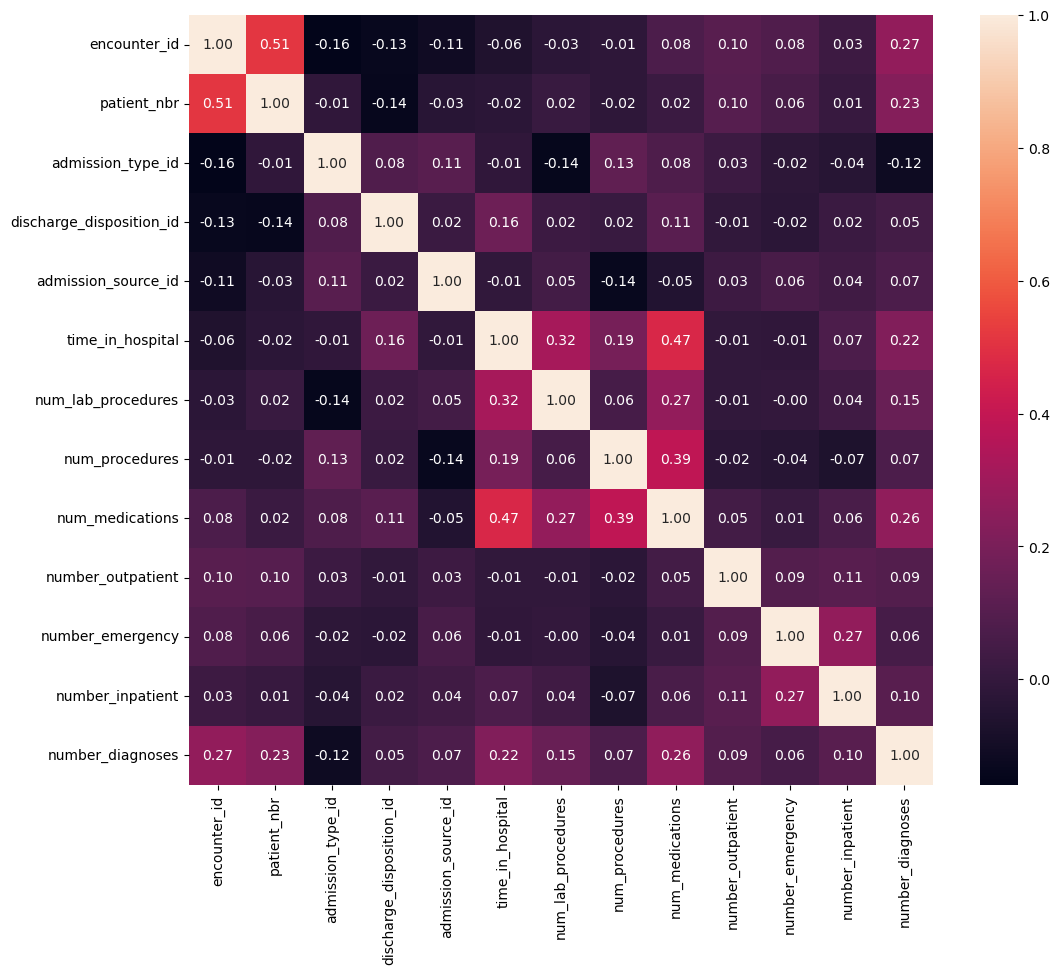

In [ ]:
# create correlation matrix using seaborn and matplotlib
import seaborn 
import matplotlib.pyplot as plt
# get the correlation of the columns
plt.figure(figsize=(12, 10))

sns.heatmap(df.select_dtypes(include='int64').corr(), annot=True, fmt=".2f")

In [ ]:
df.isnull().sum()
# only print columns with missing values 
df.isnull().sum()[df.isnull().sum() > 0]


max_glu_serum    96420
A1Cresult        84748
dtype: int64

In [ ]:
# print columns with ? values 
df.isin(['?']).sum()[df.isin(['?']).sum() > 0]
# sort by the number of ? values in each column but only show columns with ? values
df.isin(['?']).sum().sort_values(ascending=False)[df.isin(['?']).sum() > 0]
# df.isin(['?']).sum().sort_values(ascending=False)

weight               98569
medical_specialty    49949
payer_code           40256
race                  2273
diag_3                1423
diag_2                 358
diag_1                  21
dtype: int64

In [ ]:
# Your case study is to build a classifier using logistic regression to predict hospital readmittance. There is missing data that must be imputed. Once again, discuss variable importance (top 5) and choose the best metric (see notes for his suggestion from log) as part of your submission.
df.shape


(101766, 50)

### The data is loaded and reviewed. the shape of the dataframe is 101766 rows with columns of data. 
### Columns weight, medical_specialty, payer_code, race, diag_3, diag_2, diag_1 in descending order from most missing values to least. 


In [ ]:
# Step 1 impute missing values 
# Review week 3, review week 4 
